In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
plt.rcParams["figure.figsize"] = 25,7
import seaborn as sns
import os
import numpy as np

In [2]:
PATH = "C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas"
List_files = os.listdir(PATH)
List_files

['Copia de Poblacion_EESS.xlsx',
 'DATA ATENCIONES ONCOLOGICAS 2022.csv',
 'SD_ENFERMEDADES_ONCOLOGICAS_ATENCIONES_TELEMEDICINA.csv',
 'TB_DIGTEL_CANCER_ATENCIONES.csv',
 'TB_DIGTEL_CANCER_ATENDIDOS.csv',
 'TB_DIGTEL_CANCER_ESTADIOS.csv',
 'TB_DIGTEL_CANCER_PROCEDIMIENTOS.csv',
 'TB_DIGTEL_CANCER_TAMIZAJE.csv',
 'TB_DIGTEL_CANCER_TRATAMIENTOS.csv',
 'Tiempos de espera.xlsx',
 'x_Codigos cáncer.xlsx',
 'z_Codigos cáncer.xlsx',
 'z_Serv oncologicos a nivel NACIONAL.xlsx']

# Códigos cancer

In [3]:
PATH1 = PATH + "\\" + List_files[-3]
print(PATH1)
df_codigos_cancer_mama = pd.read_excel(PATH1, sheet_name = "Codigos mama")
df_codigos_cancer_mama = df_codigos_cancer_mama.iloc[:,3:]
# FORWARD FILL with last valid observation
df_codigos_cancer_mama = df_codigos_cancer_mama.fillna(method='ffill')

df_codigos_cancer_mama = df_codigos_cancer_mama.drop_duplicates()

df_codigos_cancer_mama.columns = ["Procedimientos/Diagnósticos","Código CIE10","Etapa"]

df_codigos_cancer_mama = df_codigos_cancer_mama.set_index(["Etapa","Procedimientos/Diagnósticos"])
#df_Poblacion_EESS = df_Poblacion_EESS.sort_index()

df_codigos_cancer_mama["Código CIE10"] = df_codigos_cancer_mama["Código CIE10"].astype(str)

df_codigos_cancer_mama

C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\x_Codigos cáncer.xlsx


Código CIE10
Etapa         Procedimientos/Diagnósticos                                    
TAMIZAJE      Mamografia Bilateral de tamizaje                          77057
BIOPSIA       Biopsia Percutánea de Mama Con Aguja Trocar, Si...        19100
              Biopsia Mamaria a Cielo Abierto                           19101
              Biopsia Percutánea de Mama con\nImágenes.                 19102
DIAGNOSTICO   Tumor Maligno del Pezón y Areola Mamaria.                  C500
              Tumor Maligno de la Porción Central de la mama             C501
              Tumor Maligno del Cuadrante Superior Interno de...         C502
              Tumor Maligno del Cuadrante Inferior Interno de...         C503
              Tumor Maligno del Cuadrante Superior Externo de...        C504 
              Tumor Maligno del Cuadrante Inferior Externo de...         C505
              Tumor Maligno de la Prolongación Axilar de la M...         C506
              Lesión de Sitios Contiguos de la Mama.                     C508
              Tumor Maligno de la Mama Parte No Especificada.            C509
QUIMIOTERAPIA 96410 Administración de Quimioterapia Endovenos...        96410
              96421 Quimioterapia en Infusión (mayor a 4h)              96421
              96549 Otros tipos de Quimioterapia.                       96549
RADIOTERAPIA  77305 Radioterapia Externa.                               77305
BRAQUITERAPIA 77501 Braquiterapia.                                      77501

In [4]:
List_etapa_cancer_mama = df_codigos_cancer_mama.index.get_level_values(0).unique()
List_etapa_cancer_mama

Index(['TAMIZAJE', 'BIOPSIA', 'DIAGNOSTICO', 'QUIMIOTERAPIA', 'RADIOTERAPIA',
       'BRAQUITERAPIA'],
      dtype='object', name='Etapa')

In [5]:
df_codigos_cancer_mama.loc[(List_etapa_cancer_mama[2],slice(None)),:]

Código CIE10
Etapa       Procedimientos/Diagnósticos                                    
DIAGNOSTICO Tumor Maligno del Pezón y Areola Mamaria.                  C500
            Tumor Maligno de la Porción Central de la mama             C501
            Tumor Maligno del Cuadrante Superior Interno de...         C502
            Tumor Maligno del Cuadrante Inferior Interno de...         C503
            Tumor Maligno del Cuadrante Superior Externo de...        C504 
            Tumor Maligno del Cuadrante Inferior Externo de...         C505
            Tumor Maligno de la Prolongación Axilar de la M...         C506
            Lesión de Sitios Contiguos de la Mama.                     C508
            Tumor Maligno de la Mama Parte No Especificada.            C509

In [6]:
dict_codigos_cancer_mama = {}
for etapa in List_etapa_cancer_mama:
    dict_codigos_cancer_mama[etapa] = df_codigos_cancer_mama.loc[(etapa,slice(None)),].values.flatten().tolist()
dict_codigos_cancer_mama

{'TAMIZAJE': ['77057'],
 'BIOPSIA': ['19100', '19101', '19102'],
 'DIAGNOSTICO': ['C500',
  'C501',
  'C502',
  'C503',
  'C504 ',
  'C505',
  'C506',
  'C508',
  'C509'],
 'QUIMIOTERAPIA': ['96410', '96421', '96549'],
 'RADIOTERAPIA': ['77305'],
 'BRAQUITERAPIA': ['77501']}

# Poblacion_EESS

In [14]:
PATH1 = PATH + "\\" + List_files[0]
df_Poblacion_EESS = pd.read_excel(PATH1)
df_Poblacion_EESS #.head(3)

,ARCHIVO AGREGADO,COD_ESTAB,NOMBRE_ESTABLECIMIENTO,DIRIS,PROVINCIA,DISTRITO,CATEGORIA,IPRESS,ESTABLECIMIENTO,Total,...,10-14,15-19,20-49,Gestantes Esperadas,TOTAL,NIÑO\n0-11,ADOLESCENTE\n12-17,JOVEN\n18-29,ADULTO\n30-59,ADULTO MAYOR\n60 A +
0,AMAZONAS,7360,FABIOLA SALAZAR LEGUIA,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,I-2,7360,FABIOLA SALAZAR LEGUIA,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,AMAZONAS,4838,HOSPITAL REGIONAL VIRGEN DE FATIMA,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,II-2,4838,HOSPITAL REGIONAL VIRGEN DE FATIMA,17162,...,753.0,722.0,3919.0,335.0,17162,3722.0,1726.0,3207.0,6494.0,2013.0
2,AMAZONAS,5044,HOSPITAL DE APOYO GUSTAVO LANATTA LUJAN,AMAZONAS,BAGUA,BAGUA,II-1,5044,HOSPITAL DE APOYO GUSTAVO LANATTA LUJAN,16945,...,737.0,728.0,3782.0,373.0,16945,3769.0,1814.0,3391.0,6191.0,1780.0
3,AMAZONAS,4950,MARIA AUXILIADORA,AMAZONAS,RODRIGUEZ DE MENDOZA,SAN NICOLAS,II-1,4950,MARIA AUXILIADORA,6695,...,310.0,295.0,1242.0,94.0,6695,1275.0,714.0,1197.0,2434.0,1075.0
4,AMAZONAS,5145,SANTA MARIA DE NIEVA,AMAZONAS,CONDORCANQUI,NIEVA,II-1,5145,SANTA MARIA DE NIEVA,1948,...,84.0,72.0,208.0,144.0,1948,1017.0,225.0,294.0,346.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8298,PASCO,1176,PUENTE PAUCARTAMBO,PASCO,OXAPAMPA,VILLA RICA,I-2,1176,P.S. Pte. Paucartambo,1065,...,52.0,46.0,218.0,28.0,1065,226.0,122.0,209.0,388.0,120.0
8299,PASCO,1181,SAN JUAN DE CACAZU,PASCO,OXAPAMPA,VILLA RICA,I-3,1181,C.S. San Juan de Cacazú *,1000,...,49.0,43.0,205.0,26.0,1000,212.0,116.0,195.0,364.0,113.0
8300,PASCO,6742,SAN PEDRO DE PICHANAZ,PASCO,OXAPAMPA,VILLA RICA,I-1,6742,P.S. San Pedro de Pichanaz,224,...,11.0,10.0,47.0,6.0,224,46.0,26.0,45.0,82.0,25.0
8301,PASCO,1189,UBIRIKI,PASCO,OXAPAMPA,VILLA RICA,I-1,1189,P.S. Ubirique,378,...,19.0,16.0,78.0,10.0,378,79.0,43.0,74.0,138.0,44.0


In [15]:
df_Poblacion_EESS.columns

Index([      'ARCHIVO AGREGADO',              'COD_ESTAB',
       'NOMBRE_ESTABLECIMIENTO',                  'DIRIS',
                    'PROVINCIA',               'DISTRITO',
                    'CATEGORIA',                 'IPRESS',
              'ESTABLECIMIENTO',                  'Total',
                              0,                        1,
                              2,                        3,
                              4,                        5,
                              6,                        7,
                              8,                        9,
                             10,                       11,
                             12,                       13,
                             14,                       15,
                             16,                       17,
                             18,                       19,
                        '20-24',                  '25-29',
                        '30-34',                  '35-39

# ATENCIONES_ONCOLOGICAS

In [16]:
PATH2 = PATH + "\\" + List_files[1]
df_ATENCIONES_ONCOLOGICAS = pd.read_csv(PATH2, sep='\t', encoding='latin-1')
df_ATENCIONES_ONCOLOGICAS #.head(3)

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE
0,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,...,FEMENINO,62,SIS GRATUITO,909,Teleorientación,20221201,NaN,NaN,0.000,20230525
1,5060,202212,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C539,...,FEMENINO,61,SIS GRATUITO,56,Consulta externa,20221115,NaN,NaN,5.920,20230525
2,112180,202207,6210,INSTITUTO NACIONAL DE ENFERMEDADES NEOPLASICAS...,LIMA,Lima,Lima,Surquillo,150141.0,C169,...,MASCULINO,73,SIS INDEPENDIENTE,71,Apoyo al diagnóstico (*),20220628,NaN,NaN,222.040,20230525
3,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121.0,C169,...,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,20221111,NaN,NaN,23.450,20230525
4,112180,202212,6211,HOSPITAL DE APOYO SANTA ROSA,LIMA,Lima,Lima,Pueblo Libre,150121.0,C169,...,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa,20221130,NaN,NaN,23.450,20230525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513525,48329,202210,6216,INSTITUTO NACIONAL DE SALUD DEL NIÑO - BREÑA,LIMA,Lima,Lima,Breña,150105.0,C920,...,FEMENINO,0,SIS GRATUITO,67,Internamiento con intervención quirúrgica mayor,20220914,20220827.0,20220914.0,13551.679,20230525
513526,48329,202209,16918,INSTITUTO NACIONAL DE SALUD DEL NIÑO - SAN BORJA,LIMA,Lima,Lima,Lima,150101.0,C920,...,FEMENINO,0,SIS GRATUITO,907,Atención por Telesalud,20220913,NaN,NaN,0.000,20230525
513527,48329,202210,16918,INSTITUTO NACIONAL DE SALUD DEL NIÑO - SAN BORJA,LIMA,Lima,Lima,Lima,150101.0,C920,...,FEMENINO,0,SIS GRATUITO,56,Consulta externa,20220914,NaN,NaN,10.690,20230525
513528,44999,202210,5576,HOSPITAL REGIONAL DE PUCALLPA,UCAYALI,Ucayali,Coronel Portillo,Calleria,250101.0,C859,...,MASCULINO,0,SIS GRATUITO,63,Atención por emergencia con observación,20221004,NaN,20221004.0,97.900,20230525


In [17]:
df_ATENCIONES_ONCOLOGICAS.columns

Index(['DOCUMENTO_ANONIMIZADO', 'PERIODO', 'RENAES', 'IPRESS', 'REGION',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO', 'CODIGO_DIAGNOSTICO',
       'DIAGNOSTICOS', 'GRUPO_DIAGNOSTICOS', 'GRUPO_COBERTURA', 'SEXO', 'EDAD',
       'TIPO_SEGURO', 'CODIGO_SERVICIO', 'SERVICIO', 'FECHA_ATENCION',
       'FECHA_INTERNAMIENTO', 'FECHA_ALTA', 'MONTO_BRUTO', 'FECHA_CORTE'],
      dtype='object')

In [18]:
df_ATENCIONES_ONCOLOGICAS.iloc[:5,8:18]

,UBIGEO,CODIGO_DIAGNOSTICO,DIAGNOSTICOS,GRUPO_DIAGNOSTICOS,GRUPO_COBERTURA,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO
0,150141.0,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,62,SIS GRATUITO,909,Teleorientación
1,150141.0,C539,"TUMOR MALIGNO DEL CUELLO DEL UTERO, SIN OTRA E...",CANCER DE CUELLO UTERINO,ONCOLOGICAS,FEMENINO,61,SIS GRATUITO,56,Consulta externa
2,150141.0,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,71,Apoyo al diagnóstico (*)
3,150121.0,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa
4,150121.0,C169,"TUMOR MALIGNO DEL ESTOMAGO, PARTE NO ESPECIFICADA",CANCER DE ESTOMAGO,ONCOLOGICAS,MASCULINO,73,SIS INDEPENDIENTE,56,Consulta externa


In [39]:
df_ATENCIONES_ONCOLOGICAS[df_ATENCIONES_ONCOLOGICAS["CODIGO_DIAGNOSTICO"]=="77057"]

,DOCUMENTO_ANONIMIZADO,PERIODO,RENAES,IPRESS,REGION,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,CODIGO_DIAGNOSTICO,...,SEXO,EDAD,TIPO_SEGURO,CODIGO_SERVICIO,SERVICIO,FECHA_ATENCION,FECHA_INTERNAMIENTO,FECHA_ALTA,MONTO_BRUTO,FECHA_CORTE


# ATENCIONES_TELEMEDICINA

In [17]:
PATH3 = PATH + "\\" + List_files[2]
df_ATENCIONES_TELEMEDICINA = pd.read_csv(PATH3, sep=';')
df_ATENCIONES_TELEMEDICINA.head(3)

,CODIGO_ATENCION,CODIGO_PACIENTE,SEXO,EDAD,PESO,TALLA,IMC,GESTANTE,TIPO_SEGURO,FECHA_SOLICITUD,...,UBIGEO_RENIEC,UBIGEO_INEI,TIPO_SERVICIO,ESPECIALIDAD,DIAGNOSTICO,DESCRIPCION_DIAGNOSTICO,TIPO_DIAGNOSTICO,CPMS,CPMS_NOMBRE,PROGRAMA_SOCIAL_JUNTOS
0,8.782240e+11,3.138370e+11,MASCULINO,19 years 4 mons 6 days,60.0,160.0,NaN,NO,SIS,29/09/2023,...,250101.0,250101,TELEINTERCONSULTA,UROLOGIA,C629,"Tumor maligno del testículo, no especificado",PRESUNTIVO,NaN,NaN,NO
1,7.451660e+11,5.101370e+11,MASCULINO,24 years 11 mons 29 days,NaN,NaN,NaN,NO,SIS,19/08/2023,...,110707.0,120607,TELEINTERCONSULTA,ENDOCRINOLOGÍA,C797,Tumor maligno secundario de la glandula suprar...,PRESUNTIVO,76536,Ecografia de partes blandas de cabeza y cuello...,NO
2,5.154630e+11,8.292960e+11,FEMENINO,83 years 6 mons 11 days,36.0,160.0,NaN,NO,SIS,22/06/2023,...,250106.0,250106,TELEINTERCONSULTA,MEDICINA INTERNA,C229,"Tumor maligno del higado, no especificado",PRESUNTIVO,74194,TEM de Abdomen Superior con Contraste,NO


In [18]:
df_ATENCIONES_TELEMEDICINA.columns

Index(['CODIGO_ATENCION', 'CODIGO_PACIENTE', 'SEXO', 'EDAD', 'PESO', 'TALLA',
       'IMC', 'GESTANTE', 'TIPO_SEGURO', 'FECHA_SOLICITUD', 'FECHA_ATENCION',
       'CODIGO_RENIPRESS', 'NOMBRE_IPRESS', 'CATEGORIA_IPRESS',
       'UBIGEO_RENIEC', 'UBIGEO_INEI', 'TIPO_SERVICIO', 'ESPECIALIDAD',
       'DIAGNOSTICO', 'DESCRIPCION_DIAGNOSTICO', 'TIPO_DIAGNOSTICO', 'CPMS',
       'CPMS_NOMBRE', 'PROGRAMA_SOCIAL_JUNTOS'],
      dtype='object')

In [36]:
df_ATENCIONES_TELEMEDICINA[df_ATENCIONES_TELEMEDICINA["CPMS"]=="77056"]

,CODIGO_ATENCION,CODIGO_PACIENTE,SEXO,EDAD,PESO,TALLA,IMC,GESTANTE,TIPO_SEGURO,FECHA_SOLICITUD,...,UBIGEO_RENIEC,UBIGEO_INEI,TIPO_SERVICIO,ESPECIALIDAD,DIAGNOSTICO,DESCRIPCION_DIAGNOSTICO,TIPO_DIAGNOSTICO,CPMS,CPMS_NOMBRE,PROGRAMA_SOCIAL_JUNTOS
237,4.186330e+11,1.142960e+11,FEMENINO,41 years 9 mons 1 day,NaN,NaN,NaN,NO,ESSALUD,21/05/2021,...,NaN,211105,TELECONSULTA,CIRUGIA ONCOLOGICA,C509,"Tumor maligno de la mama, parte no especificada",PRESUNTIVO,77056,"Mamografia, bilateral",NO
423,4.646470e+11,2.832570e+11,FEMENINO,48 years 5 mons 29 days,NaN,NaN,NaN,NO,SIS,01/06/2021,...,200110.0,210111,TELECONSULTA,CIRUGIA ONCOLOGICA,C509,"Tumor maligno de la mama, parte no especificada",REPETIDO,77056,"Mamografia, bilateral",NO
429,4.646470e+11,2.832570e+11,FEMENINO,48 years 5 mons 29 days,NaN,NaN,NaN,NO,SIS,01/06/2021,...,200110.0,210111,TELECONSULTA,CIRUGIA ONCOLOGICA,C795,Tumor maligno secundario de los huesos y de la...,PRESUNTIVO,77056,"Mamografia, bilateral",NO
5033,1.325250e+11,3.042130e+11,FEMENINO,67 years 2 mons 9 days,NaN,NaN,NaN,NO,SIS,21/12/2021,...,140903.0,150203,TELECONSULTA,MEDICINA GENERAL,C509,"Tumor maligno de la mama, parte no especificada",PRESUNTIVO,77056,"Mamografia, bilateral",NO
5035,2.459750e+11,3.042130e+11,FEMENINO,67 years 2 mons 9 days,NaN,NaN,NaN,NO,SIS,21/12/2021,...,140903.0,150203,TELECONSULTA,MEDICINA GENERAL,C509,"Tumor maligno de la mama, parte no especificada",PRESUNTIVO,77056,"Mamografia, bilateral",NO
6392,2.425120e+11,4.050030e+11,FEMENINO,77 years 5 mons 4 days,NaN,NaN,NaN,NO,SIS,03/03/2022,...,200901.0,211101,TELECONSULTA,CIRUGIA ONCOLOGICA,C509,"Tumor maligno de la mama, parte no especificada",PRESUNTIVO,77056,"Mamografia, bilateral",NO
6573,5.265080e+11,9.158230e+11,FEMENINO,46 years 2 mons 13 days,NaN,NaN,NaN,NO,SIS,13/03/2022,...,201201.0,210501,TELEMONITOREO,CIRUGIA ONCOLOGICA,C509,"Tumor maligno de la mama, parte no especificada",PRESUNTIVO,77056,"Mamografia, bilateral",NO


# CANCER_ATENCIONES

In [37]:
PATH4 = PATH + "\\" + List_files[3]
df_CANCER_ATENCIONES = pd.read_csv(PATH4, sep='\t')
df_CANCER_ATENCIONES.head(3)

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess
0,41473799,62,A,M,1045.0,20190518,60a+,C159,P,714
1,41473799,62,A,M,1045.0,20190518,60a+,C169,P,714
2,41474440,57,A,M,1243.0,20190522,30a-59a,C169,D,11165


In [49]:
df_CANCER_ATENCIONES["Tipo_Dx"].unique()

array(['P', 'D', 'R', 'p', 'r', 'd'], dtype=object)

In [130]:
df_CANCER_ATENCIONES_DEFINITIVO = df_CANCER_ATENCIONES[df_CANCER_ATENCIONES["Tipo_Dx"].isin(["D","d"])]
df_CANCER_ATENCIONES_DEFINITIVO["Fecha_atencion"] = pd.to_datetime(df_CANCER_ATENCIONES_DEFINITIVO["Fecha_atencion"], format="%Y%m%d")
df_CANCER_ATENCIONES_DEFINITIVO["Year"] = df_CANCER_ATENCIONES_DEFINITIVO["Fecha_atencion"].dt.year
#df_CANCER_ATENCIONES_DEFINITIVO = df_CANCER_ATENCIONES_DEFINITIVO[df_CANCER_ATENCIONES_DEFINITIVO["Fecha_atencion"] >= "2019-01-01"]
#df_CANCER_ATENCIONES_DEFINITIVO = df_CANCER_ATENCIONES_DEFINITIVO[df_CANCER_ATENCIONES_DEFINITIVO["Fecha_atencion"] < "2020-01-01"]
df_CANCER_ATENCIONES_DEFINITIVO

C:\Users\Amador\AppData\Local\Temp\ipykernel_16436\1511853992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CANCER_ATENCIONES_DEFINITIVO["Fecha_atencion"] = pd.to_datetime(df_CANCER_ATENCIONES_DEFINITIVO["Fecha_atencion"], format="%Y%m%d")
C:\Users\Amador\AppData\Local\Temp\ipykernel_16436\1511853992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CANCER_ATENCIONES_DEFINITIVO["Year"] = df_CANCER_ATENCIONES_DEFINITIVO["Fecha_atencion"].dt.year


,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,Year
2,41474440,57,A,M,1243.0,2019-05-22,30a-59a,C169,D,11165,2019
3,41474302,55,A,F,1243.0,2019-05-24,30a-59a,C719,D,11165,2019
5,41473772,63,A,F,1243.0,2019-05-28,60a+,C509,D,11165,2019
6,41473662,35,A,F,1243.0,2019-05-27,30a-59a,C509,D,11165,2019
7,41473603,67,A,F,1243.0,2019-05-28,60a+,C20X,D,11165,2019
...,...,...,...,...,...,...,...,...,...,...,...
943506,29118088,4,M,M,1164.0,2019-02-04,00a-11a,C840,D,5353,2019
943507,29118101,8,M,M,1517.0,2019-06-06,00a-11a,C009,D,2828,2019
943508,23671453,4,A,M,993.0,2023-05-04,00a-11a,C001,D,3374,2023
943509,23690549,2,A,F,1312.0,2021-07-17,00a-11a,C001,D,5845,2021


In [131]:
df_sample1 = df_CANCER_ATENCIONES_DEFINITIVO[df_CANCER_ATENCIONES_DEFINITIVO["Diagnostico"].isin(dict_canceres[List_canceres[0]])]
# drop duplicates of "id_persona"
df_sample1 = df_sample1.drop_duplicates(subset=["id_persona"])
df_sample1["Tipo_cancer"] = List_canceres[0]
df_sample1

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,Year,Tipo_cancer
72,41475987,58,A,M,701.0,2019-07-15,30a-59a,C186,D,2300,2019,CIE 10 - Cáncer de Colon y Recto
81,41475848,50,A,F,690.0,2023-06-23,30a-59a,C189,D,6215,2023,CIE 10 - Cáncer de Colon y Recto
134,32416,62,A,F,1322.0,2023-06-12,60a+,C188,D,5574,2023,CIE 10 - Cáncer de Colon y Recto
240,56023,66,A,M,1315.0,2023-02-13,60a+,C181,D,7437,2023,CIE 10 - Cáncer de Colon y Recto
350,41473671,60,A,M,690.0,2023-03-07,60a+,C180,D,6215,2023,CIE 10 - Cáncer de Colon y Recto
...,...,...,...,...,...,...,...,...,...,...,...,...
942772,28763109,44,A,F,1291.0,2021-03-17,30a-59a,C189,D,5943,2021,CIE 10 - Cáncer de Colon y Recto
943117,22920652,44,A,F,1618.0,2021-02-11,30a-59a,C189,D,6203,2021,CIE 10 - Cáncer de Colon y Recto
943140,31431710,52,A,F,1607.0,2023-07-20,30a-59a,C180,D,2021,2023,CIE 10 - Cáncer de Colon y Recto
943370,10192505,2,A,F,910.0,2021-05-08,00a-11a,C185,D,6207,2021,CIE 10 - Cáncer de Colon y Recto


In [132]:
df_cancer_matriz = []

for cancer in List_canceres:
    df_sample = df_CANCER_ATENCIONES_DEFINITIVO[df_CANCER_ATENCIONES_DEFINITIVO["Diagnostico"].isin(dict_canceres[cancer])]
    # drop duplicates of "id_persona"
    df_sample = df_sample.drop_duplicates(subset=["id_persona"])
    df_sample["Tipo_cancer"] = cancer
    df_cancer_matriz.append(df_sample)
df_cancer_matriz = pd.concat(df_cancer_matriz, axis=0)
df_cancer_matriz

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,Year,Tipo_cancer
72,41475987,58,A,M,701.0,2019-07-15,30a-59a,C186,D,2300,2019,CIE 10 - Cáncer de Colon y Recto
81,41475848,50,A,F,690.0,2023-06-23,30a-59a,C189,D,6215,2023,CIE 10 - Cáncer de Colon y Recto
134,32416,62,A,F,1322.0,2023-06-12,60a+,C188,D,5574,2023,CIE 10 - Cáncer de Colon y Recto
240,56023,66,A,M,1315.0,2023-02-13,60a+,C181,D,7437,2023,CIE 10 - Cáncer de Colon y Recto
350,41473671,60,A,M,690.0,2023-03-07,60a+,C180,D,6215,2023,CIE 10 - Cáncer de Colon y Recto
...,...,...,...,...,...,...,...,...,...,...,...,...
942671,31405919,72,A,F,601.0,2019-02-18,60a+,C349,D,7271,2019,CIE 10 - Cáncer de Pulmón
942781,28763112,45,A,M,1313.0,2023-01-09,30a-59a,C349,D,6207,2023,CIE 10 - Cáncer de Pulmón
942936,36500067,41,A,M,1741.0,2019-04-02,30a-59a,C340,D,6719,2019,CIE 10 - Cáncer de Pulmón
943257,33895770,78,A,F,1595.0,2023-04-27,60a+,C349,D,6207,2023,CIE 10 - Cáncer de Pulmón


In [133]:
df_cancer_matriz_A =df_cancer_matriz.groupby(["Tipo_cancer","Year","Sexo"])[["id_persona"]].count()
df_cancer_matriz_A = df_cancer_matriz_A.sort_values(by=["Tipo_cancer","Sexo"])
df_cancer_matriz_A

id_persona
Tipo_cancer                       Year Sexo            
CIE 10 - Cáncer de Colon y Recto  2019 F            853
                                  2021 F            786
                                  2023 F           1640
                                  2019 M            612
                                  2021 M            692
                                  2023 M           1227
CIE 10 - Cáncer de Cuello Uterino 2019 F           2416
                                  2021 F           5342
                                  2023 F           6849
                                  2019 M              3
                                  2021 M              3
                                  2023 M              4
CIE 10 - Cáncer de Estómago       2019 F           1035
                                  2021 F           1007
                                  2023 F           1524
                                  2019 M            991
                                  2021 M           1049
                                  2023 M           1553
CIE 10 - Cáncer de Ganglio        2019 F           1179
                                  2021 F           1208
                                  2023 F           1625
                                  2019 M            903
                                  2021 M           1136
                                  2023 M           1510
CIE 10 - Cáncer de Mama           2019 F           4548
                                  2021 F           5339
                                  2023 F           8098
                                  2019 M            901
                                  2021 M            150
                                  2023 M            200
CIE 10 - Cáncer de Medula Ósea    2019 F            420
                                  2021 F            840
                                  2023 F            953
                                  2019 M            441
                                  2021 M            981
                                  2023 M           1028
CIE 10 - Cáncer de Piel           2019 F           1722
                                  2021 F            909
                                  2023 F           2542
                                  2019 M           1392
                                  2021 M            699
                                  2023 M           1742
CIE 10 - Cáncer de Próstata       2019 F              3
                                  2021 F              6
                                  2023 F              8
                                  2019 M           1526
                                  2021 M           1865
                                  2023 M           3913
CIE 10 - Cáncer de Pulmón         2019 F            473
                                  2021 F            537
                                  2023 F            868
                                  2019 M            595
                                  2021 M            391
                                  2023 M            663

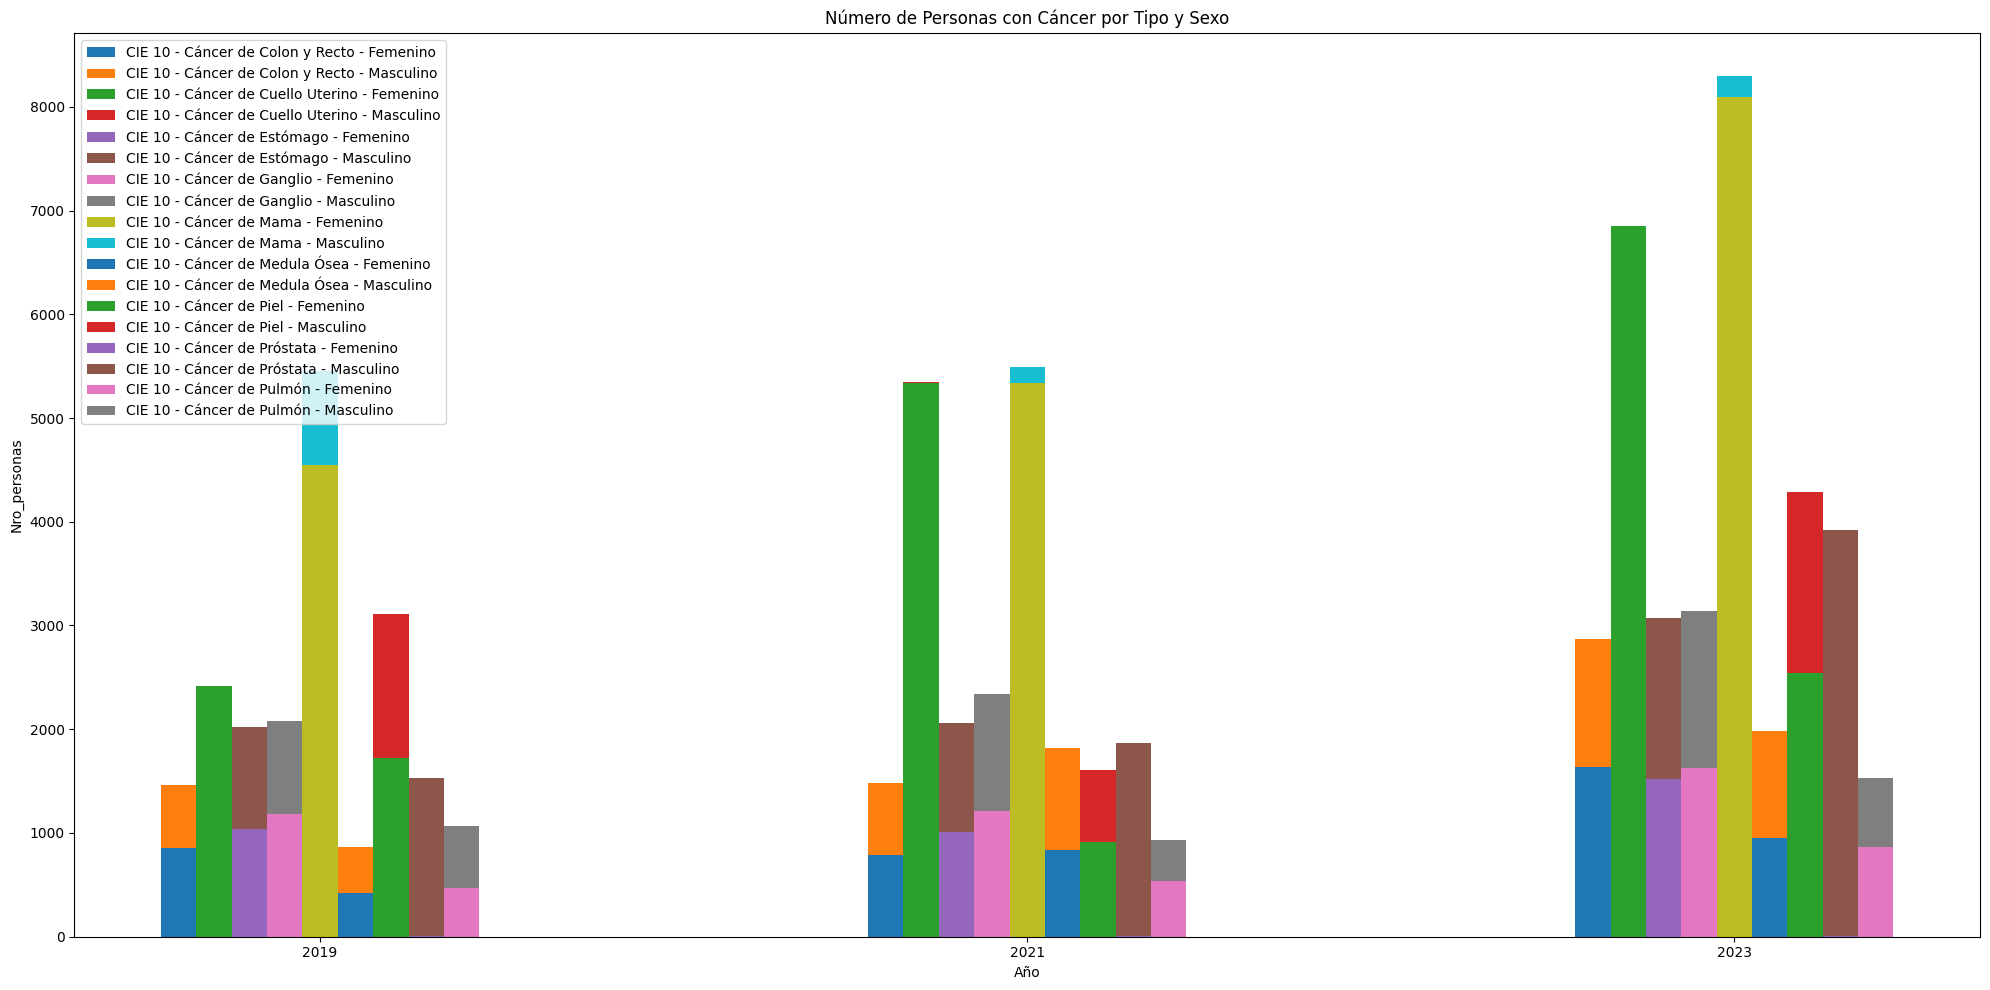

In [141]:
df_unstacked = df_cancer_matriz_A.unstack(level=-1)['id_persona'].fillna(0).reset_index()

# Gráfico
plt.figure(figsize=(20, 10))

types = df_unstacked['Tipo_cancer'].unique()
years = df_unstacked['Year'].unique()

# Ancho de cada barra
bar_width = 0.05
index = np.arange(len(years))

for i, tipo in enumerate(types):
    subset = df_unstacked[df_unstacked['Tipo_cancer'] == tipo]
    
    # Posición de las barras para cada tipo de cáncer
    bar_positions = index + i * bar_width
    
    plt.bar(bar_positions, subset['F'], width=bar_width, label=f'{tipo} - Femenino')
    plt.bar(bar_positions, subset['M'], width=bar_width, bottom=subset['F'], label=f'{tipo} - Masculino')

# Ajustando eje x
plt.xticks(index + bar_width * len(types) / 2 - bar_width / 2, years)

plt.legend()
plt.xlabel('Año')
plt.ylabel('Nro_personas')
plt.title('Número de Personas con Cáncer por Tipo y Sexo')
plt.tight_layout()
plt.show()

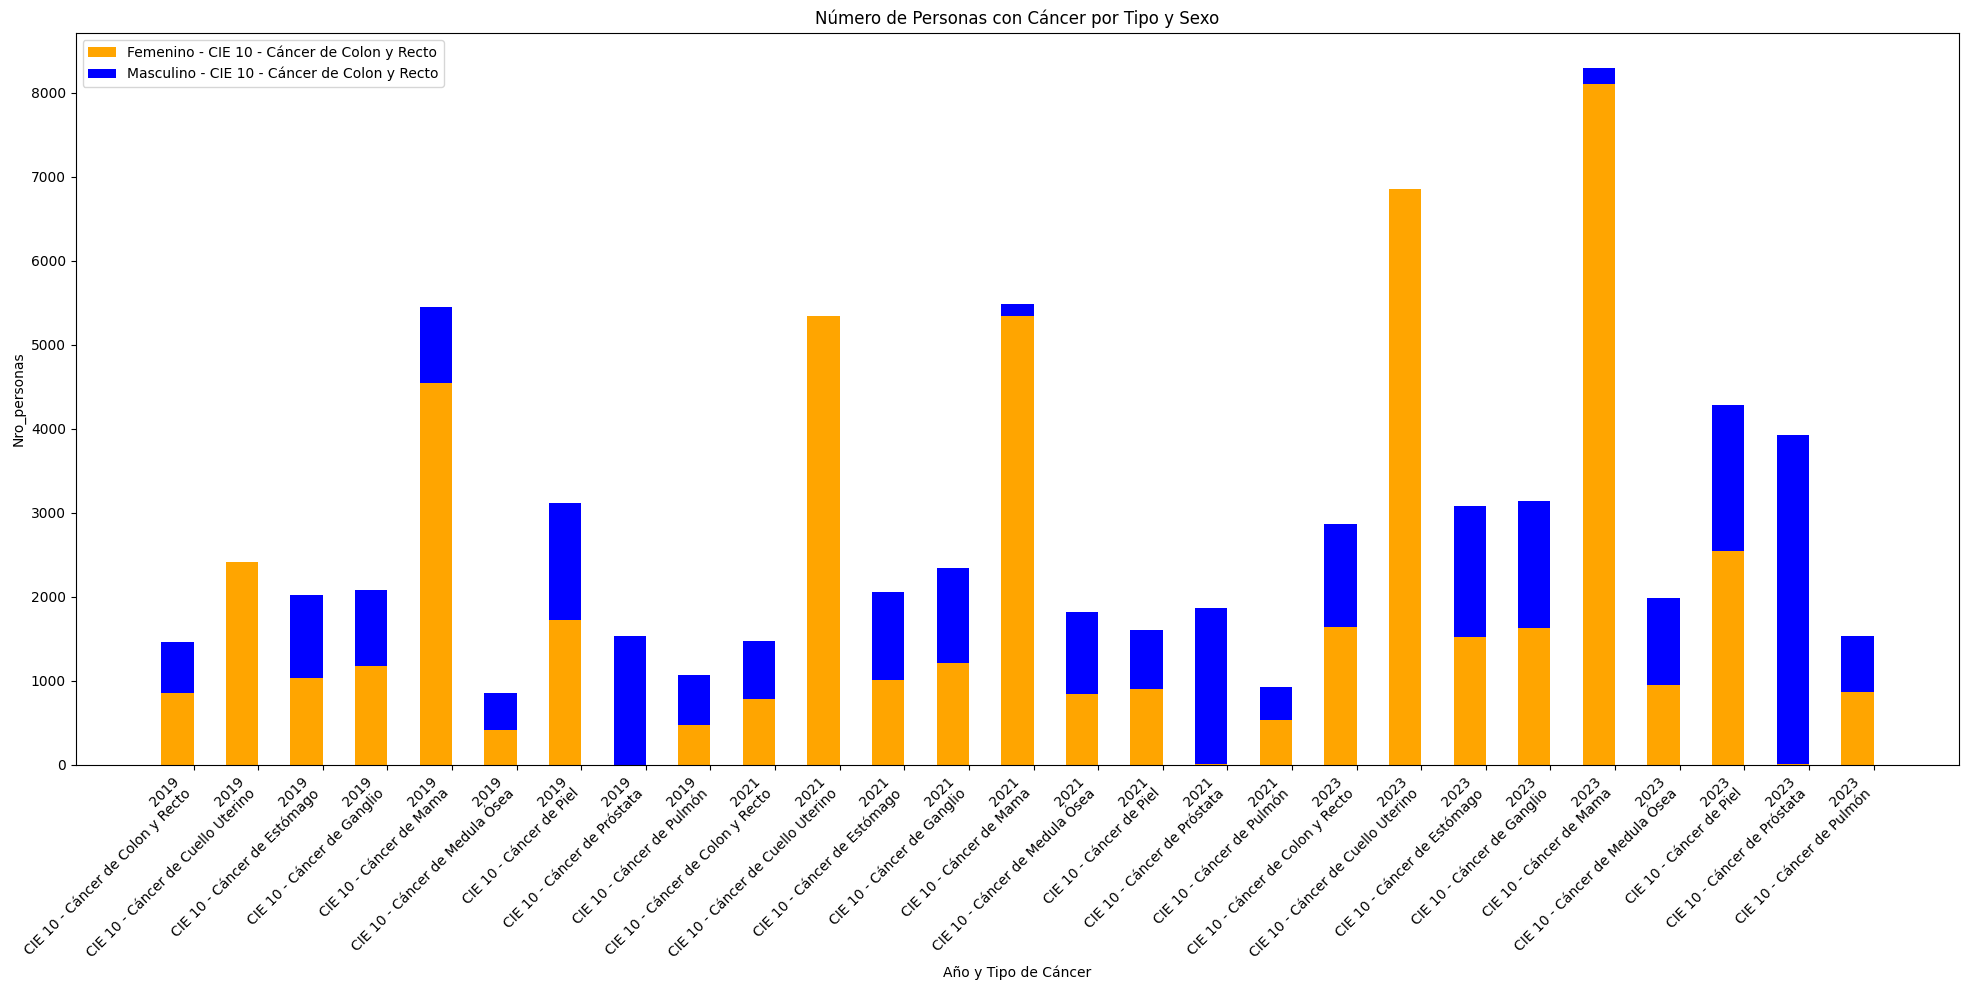

In [142]:
# Reestructurando el DataFrame
df_unstacked = df_cancer_matriz_A.unstack(level=-1)['id_persona'].fillna(0).reset_index()

# Gráfico
plt.figure(figsize=(20, 10))

types = df_unstacked['Tipo_cancer'].unique()
years = df_unstacked['Year'].unique()

# Ancho de cada barra
bar_width = 0.15
index = np.arange(len(years) * len(types)) * (bar_width * 2)

# Creando las etiquetas para el eje x
xticks_labels = []
for year in years:
    for tipo in types:
        xticks_labels.append(f"{year}\n{tipo}")

for i, tipo in enumerate(types):
    subset = df_unstacked[df_unstacked['Tipo_cancer'] == tipo]
    
    # Posición de las barras para cada tipo de cáncer y año
    bar_positions = index[i::len(types)]
    
    plt.bar(bar_positions, subset['F'], width=bar_width, color='orange', label=f'Femenino - {tipo}' if i==0 else "")
    plt.bar(bar_positions, subset['M'], width=bar_width, bottom=subset['F'], color='blue', label=f'Masculino - {tipo}' if i==0 else "")

# Ajustando eje x
plt.xticks(index + bar_width/2, xticks_labels, rotation=45, ha='right')

# Mostrando leyenda y ajustes finales
plt.legend()
plt.xlabel('Año y Tipo de Cáncer')
plt.ylabel('Nro_personas')
plt.title('Número de Personas con Cáncer por Tipo y Sexo')
plt.tight_layout()
plt.show()

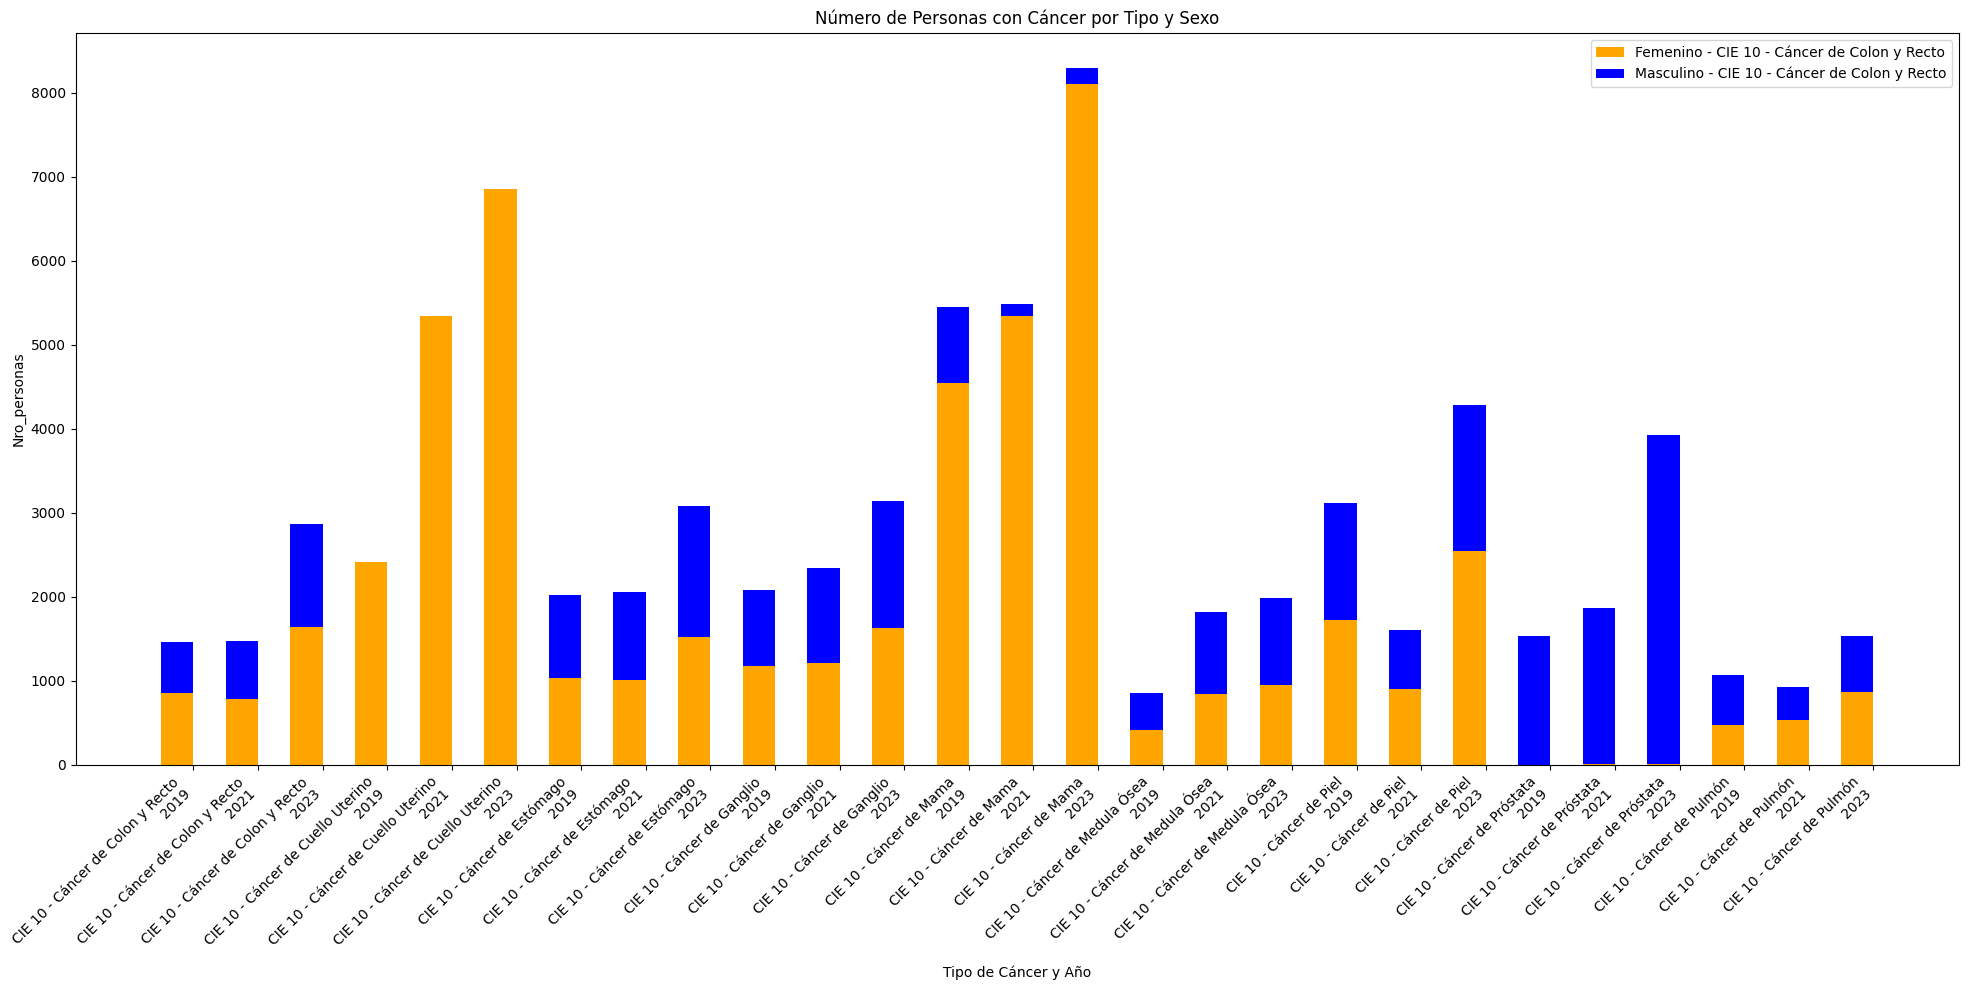

In [143]:
# Reestructurando el DataFrame
df_unstacked = df_cancer_matriz_A.unstack(level=-1)['id_persona'].fillna(0).reset_index()

# Ordenando el DataFrame por Tipo_cancer y Year
df_unstacked = df_unstacked.sort_values(by=['Tipo_cancer', 'Year'])

# Gráfico
plt.figure(figsize=(20, 10))

types = df_unstacked['Tipo_cancer'].unique()
years = df_unstacked['Year'].unique()

# Ancho de cada barra
bar_width = 0.15
index = np.arange(len(years) * len(types)) * (bar_width * 2)

# Creando las etiquetas para el eje x
xticks_labels = []
for tipo in types:
    for year in years:
        xticks_labels.append(f"{tipo}\n{year}")

for i, tipo in enumerate(types):
    subset = df_unstacked[df_unstacked['Tipo_cancer'] == tipo]
    
    # Posición de las barras para cada tipo de cáncer y año
    bar_positions = index[i*len(years):(i+1)*len(years)]
    
    plt.bar(bar_positions, subset['F'], width=bar_width, color='orange', label=f'Femenino - {tipo}' if i==0 else "")
    plt.bar(bar_positions, subset['M'], width=bar_width, bottom=subset['F'], color='blue', label=f'Masculino - {tipo}' if i==0 else "")

# Ajustando eje x
plt.xticks(index + bar_width/2, xticks_labels, rotation=45, ha='right')

# Mostrando leyenda y ajustes finales
plt.legend()
plt.xlabel('Tipo de Cáncer y Año')
plt.ylabel('Nro_personas')
plt.title('Número de Personas con Cáncer por Tipo y Sexo')
plt.tight_layout()
plt.show()

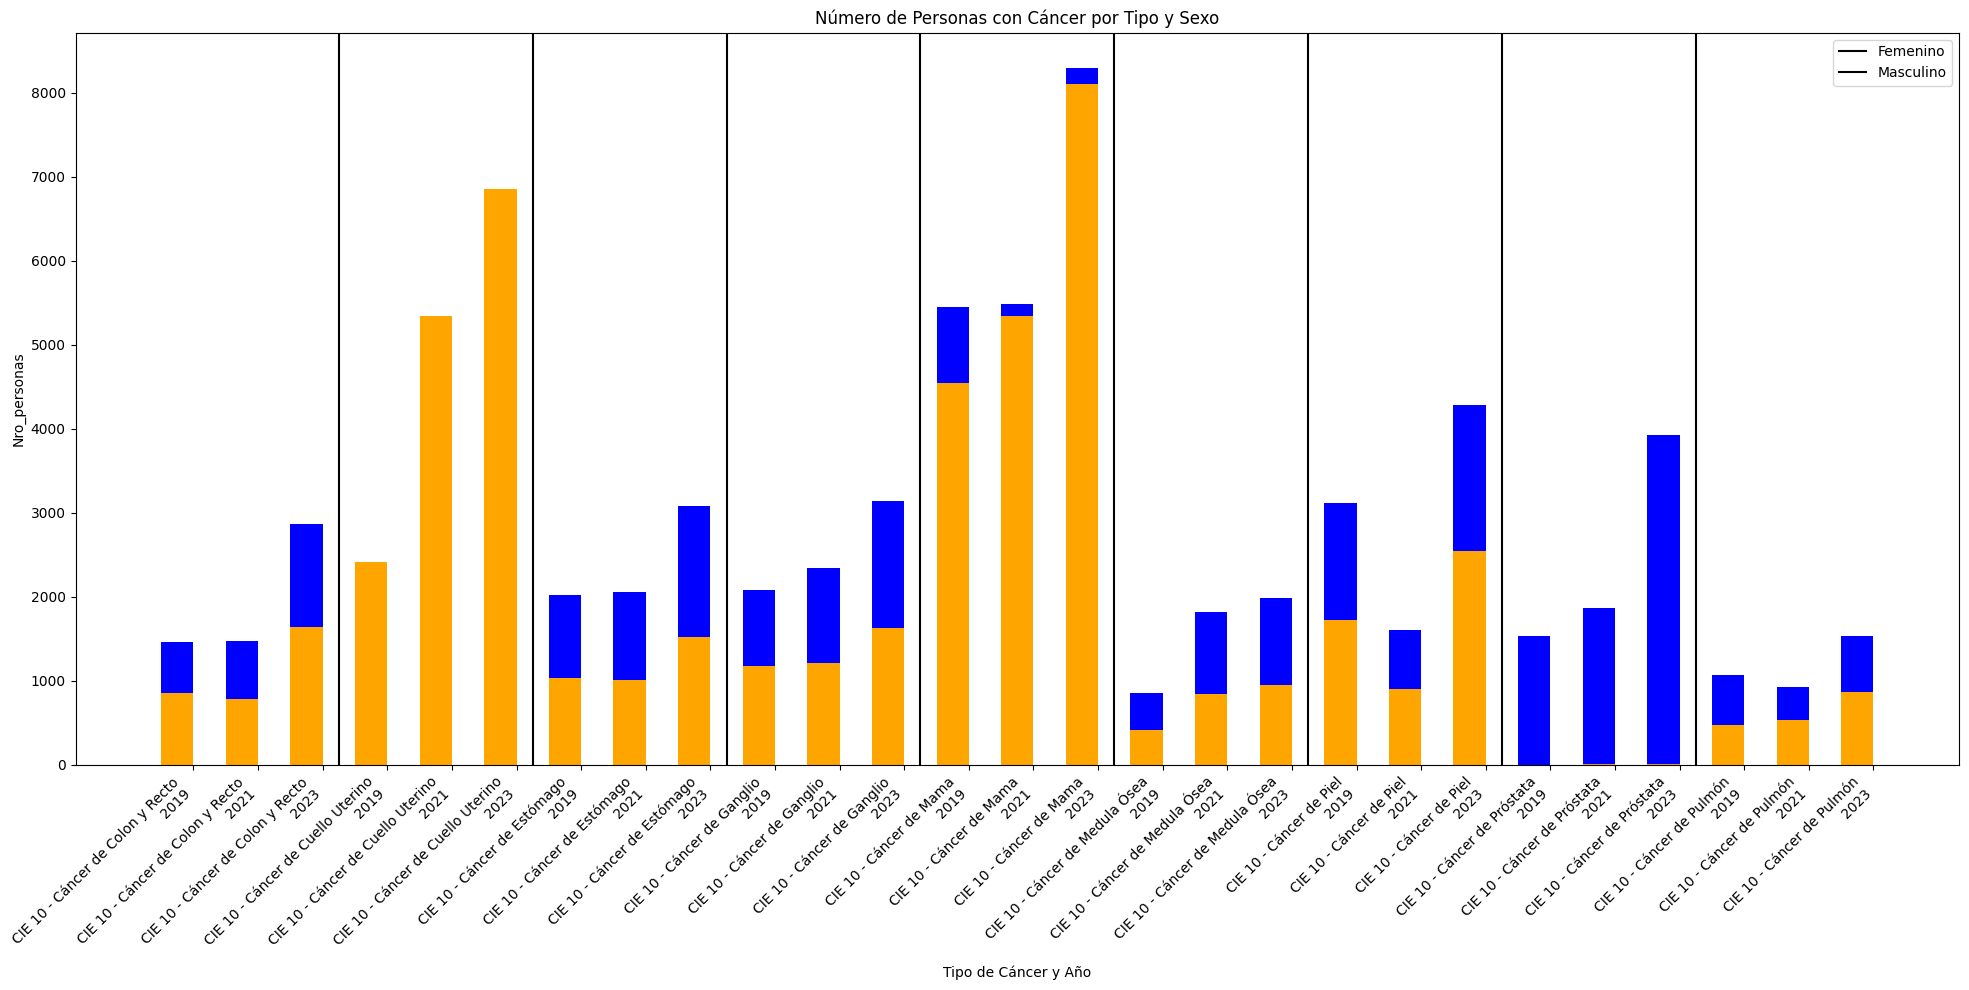

In [144]:
# Reestructurando el DataFrame
df_unstacked = df_cancer_matriz_A.unstack(level=-1)['id_persona'].fillna(0).reset_index()

# Ordenando el DataFrame por Tipo_cancer y Year
df_unstacked = df_unstacked.sort_values(by=['Tipo_cancer', 'Year'])

# Gráfico
plt.figure(figsize=(20, 10))

types = df_unstacked['Tipo_cancer'].unique()
years = df_unstacked['Year'].unique()

# Ancho de cada barra
bar_width = 0.15
index = np.arange(len(years) * len(types)) * (bar_width * 2)

# Creando las etiquetas para el eje x
xticks_labels = []
for tipo in types:
    for year in years:
        xticks_labels.append(f"{tipo}\n{year}")

for i, tipo in enumerate(types):
    subset = df_unstacked[df_unstacked['Tipo_cancer'] == tipo]
    
    # Posición de las barras para cada tipo de cáncer y año
    bar_positions = index[i*len(years):(i+1)*len(years)]
    
    plt.bar(bar_positions, subset['F'], width=bar_width, color='orange')
    plt.bar(bar_positions, subset['M'], width=bar_width, bottom=subset['F'], color='blue')
    
    # Añadiendo línea vertical para separar los tipos de cáncer si no es el último tipo
    if i < len(types) - 1:
        plt.axvline(x=bar_positions[-1] + bar_width, color='black', linestyle='-')

# Ajustando eje x
plt.xticks(index + bar_width/2, xticks_labels, rotation=45, ha='right')

# Mostrando leyenda y ajustes finales
plt.legend(['Femenino', 'Masculino'])
plt.xlabel('Tipo de Cáncer y Año')
plt.ylabel('Nro_personas')
plt.title('Número de Personas con Cáncer por Tipo y Sexo')
plt.tight_layout()
plt.show()

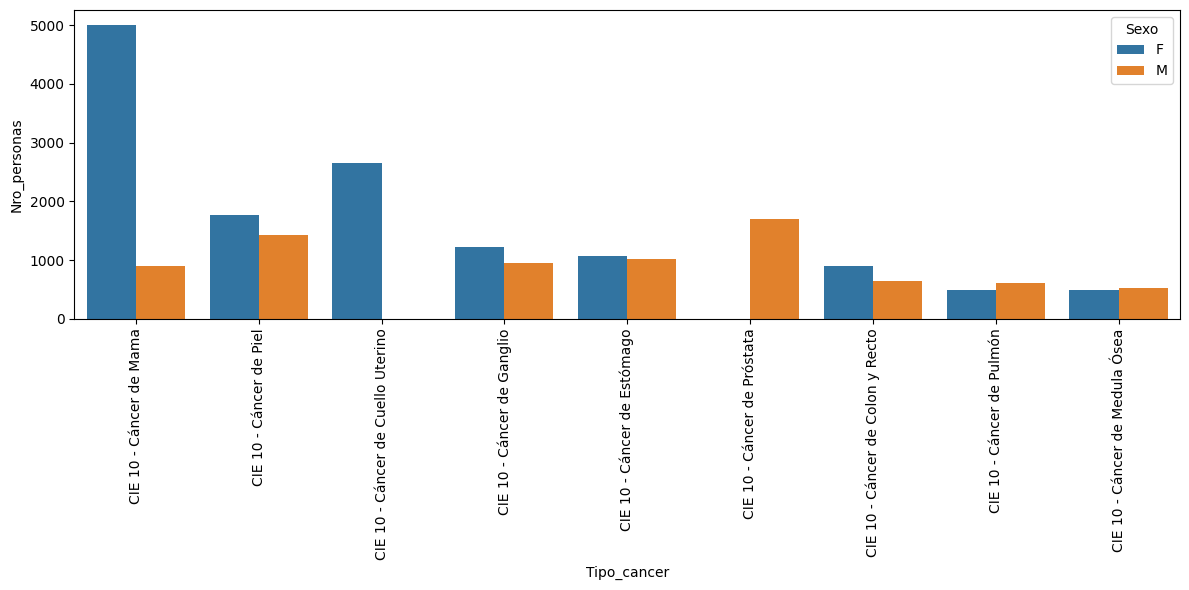

In [118]:
# Reiniciar el índice para trabajar más fácilmente con seaborn
df_reset = df_cancer_matriz_A.reset_index()
df_reset.columns = ['Tipo_cancer', 'Sexo', 'Nro_personas']
order = df_reset.groupby('Tipo_cancer').sum().sort_values('Nro_personas', ascending=False).index

# Dibujar el gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(data=df_reset, x='Tipo_cancer', y='Nro_personas', hue='Sexo', order=order)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

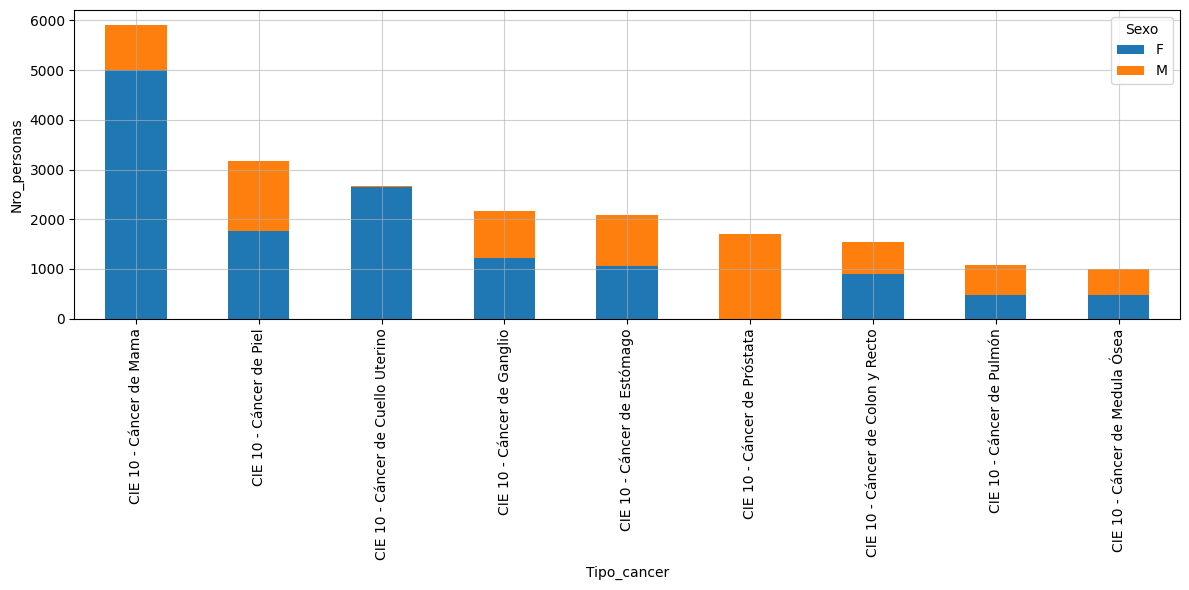

In [119]:
# Pivotear el dataframe y ordenar los datos
df_pivot = df_cancer_matriz_A.unstack().fillna(0)
df_pivot.columns = df_pivot.columns.droplevel()

# Ordenar el dataframe df_pivot en base a la suma
order = df_pivot.sum(axis=1).sort_values(ascending=False).index
df_pivot = df_pivot.reindex(order)

# Dibujar el gráfico de barras apiladas
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_ylabel('Nro_personas')
ax.set_xlabel('Tipo_cancer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(alpha = 0.6)
plt.show()

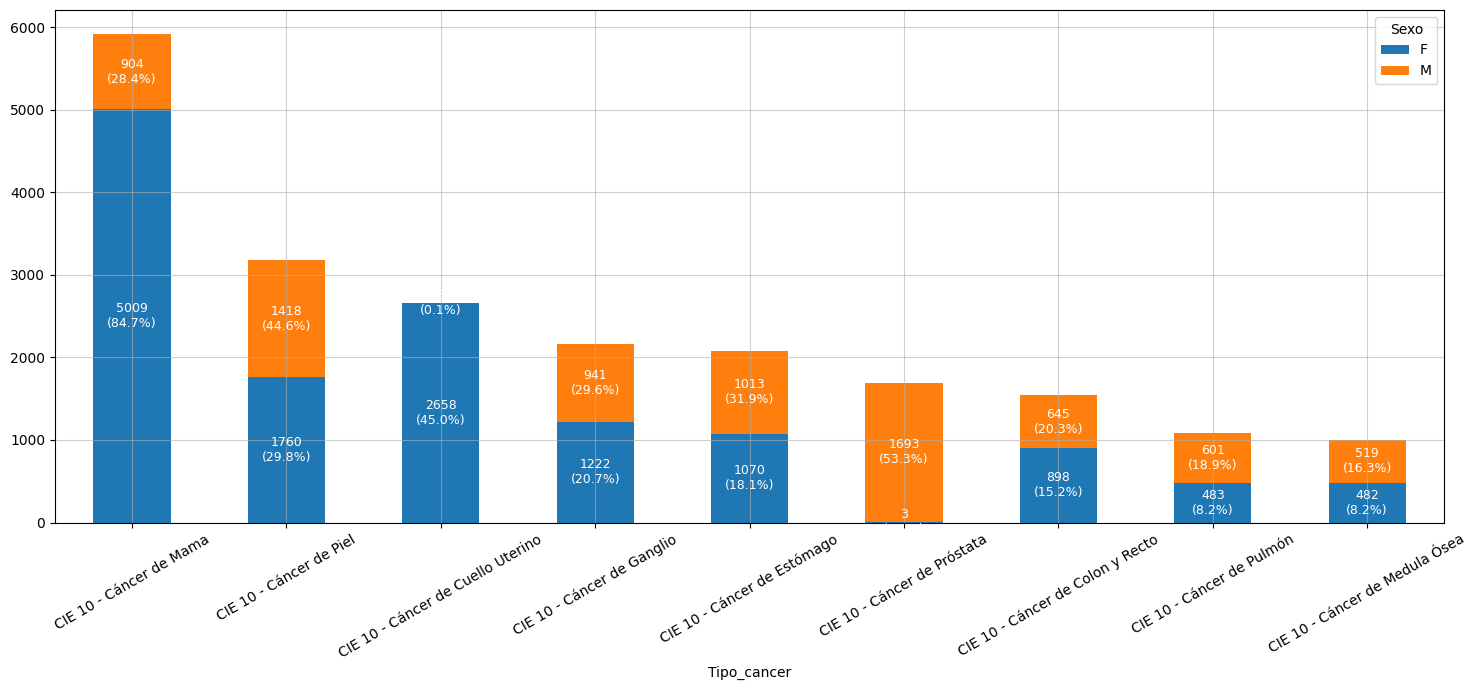

In [124]:
# Pivotear el dataframe
df_pivot = df_cancer_matriz_A.unstack().fillna(0)
df_pivot.columns = df_pivot.columns.droplevel()

# Ordenar el dataframe df_pivot en base a la suma
order = df_pivot.sum(axis=1).sort_values(ascending=False).index
df_pivot = df_pivot.reindex(order)

# Dibujar el gráfico de barras apiladas
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(15, 7))

# Agregar etiquetas a las barras
for i, rect_group in enumerate(ax.containers):  # Iterar sobre los grupos de barras (M y F en este caso)
    for rect in rect_group:  # Iterar sobre cada barra dentro del grupo
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        
        # Calcula el porcentaje del valor con respecto al total para ese tipo de cáncer
        percentage = (height / df_pivot.iloc[i].sum()) * 100

        # Posiciona el texto en el medio de la barra
        label_x = x + width / 2
        label_y = y + height / 2
        
        # Coloca el texto en la barra. Puedes ajustar el formato según tus preferencias.
        ax.text(label_x, label_y, f"{int(height)}\n({percentage:.1f}%)", ha='center', va='center', color='white', fontsize=9)

plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(alpha = 0.6)
plt.show()

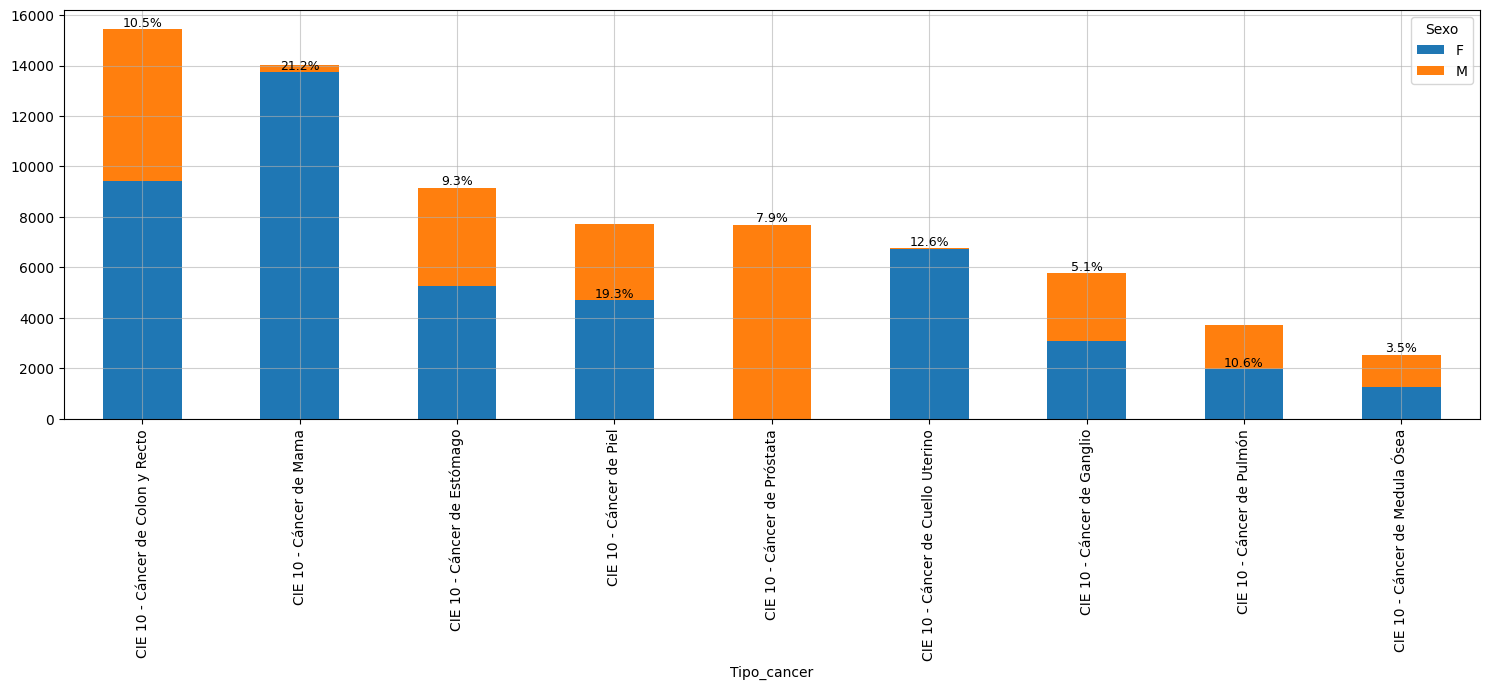

In [112]:

# Pivotear el dataframe
df_pivot = df_cancer_matriz_A.unstack().fillna(0)
df_pivot.columns = df_pivot.columns.droplevel()

# Ordenar el dataframe df_pivot en base a la suma
order = df_pivot.sum(axis=1).sort_values(ascending=False).index
df_pivot = df_pivot.reindex(order)

# Dibujar el gráfico de barras apiladas
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(15, 7))

# Calcular el total de personas con cáncer
total_personas = df_pivot.sum().sum()

# Agregar etiquetas a las barras
for i, rect in enumerate(ax.patches): 
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # Calcula el porcentaje del valor total de esa categoría con respecto al total
    percentage = (df_pivot.iloc[int(i/2)].sum() / total_personas) * 100

    # Posiciona el texto en la parte superior de la barra completa
    # Lo hacemos solo para las barras correspondientes al sexo 'M', que son las superiores
    if df_pivot.columns[int(i % len(df_pivot.columns))] == 'M':
        label_x = x + width / 2
        label_y = y + height
        
        # Coloca el texto en la barra. Puedes ajustar el formato según tus preferencias.
        ax.text(label_x, label_y, f"{percentage:.1f}%", ha='center', va='bottom', color='black', fontsize=9)

plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(alpha = 0.6)
plt.show()

# CANCER_ATENDIDOS

In [113]:
PATH5 = PATH + "\\" + List_files[4]
print("Abriendo archivo: ", PATH5)

tipos = {'ï»¿id_persona': int,
         'Edad': int,
         'Tipo_edad': str,
         'Sexo': str,
         'id_ubigeo' : str,
         'Fecha_atencion': str,
         'Etapa': str,
         'Diagnostico': str,
         'Tipo_Dx': str,
         'id_eess' : str,}

df_CANCER_ATENDIDOS = pd.read_csv(PATH5, dtype = tipos, sep=',', encoding='latin-1')
df_CANCER_ATENDIDOS["Fecha_atencion"] = pd.to_datetime(df_CANCER_ATENDIDOS["Fecha_atencion"], format="%Y%m%d")
df_CANCER_ATENDIDOS["Year"] = df_CANCER_ATENDIDOS["Fecha_atencion"].dt.year

# sort by Fecha_atencion
df_CANCER_ATENDIDOS = df_CANCER_ATENDIDOS.sort_values(by=["Fecha_atencion"], ascending=True)

df_CANCER_ATENDIDOS.columns = ['id_persona', 'Edad', 'Tipo_edad', 'Sexo', 'id_ubigeo', 'Fecha_atencion', 'Diagnostico', 'Tipo_Dx', 'id_eess', 'Etapa', 'Year']

df_CANCER_ATENDIDOS.head(5)

Abriendo archivo:  C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\TB_DIGTEL_CANCER_ATENDIDOS.csv


,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,Etapa,Year
395876,33592321,6,A,M,1719,2019-01-01,C459,D,3297,00a-11a,2019
419055,17522277,85,A,M,659,2019-01-01,C300,D,4486,60a+,2019
234221,36716199,82,A,M,563,2019-01-01,C61X,D,4652,60a+,2019
284301,20908554,39,A,F,346,2019-01-01,C112,D,23488,30a-59a,2019
435905,35901931,64,A,F,1247,2019-01-01,C541,D,4329,60a+,2019


In [114]:
dict_codigos_cancer_mama

{'TAMIZAJE': ['77057'],
 'BIOPSIA': ['19100', '19101', '19102'],
 'DIAGNOSTICO': ['C500',
  'C501',
  'C502',
  'C503',
  'C504 ',
  'C505',
  'C506',
  'C508',
  'C509'],
 'QUIMIOTERAPIA': ['96410', '96421', '96549'],
 'RADIOTERAPIA': ['77305'],
 'BRAQUITERAPIA': ['77501']}

In [115]:
df_CANCER_ATENDIDOS.columns

Index(['id_persona', 'Edad', 'Tipo_edad', 'Sexo', 'id_ubigeo',
       'Fecha_atencion', 'Diagnostico', 'Tipo_Dx', 'id_eess', 'Etapa', 'Year'],
      dtype='object')

In [172]:
df_CANCER_ATENDIDOS_CANCER_MAMA = df_CANCER_ATENDIDOS[df_CANCER_ATENDIDOS["Diagnostico"].isin(dict_codigos_cancer_mama["DIAGNOSTICO"])]
# drop duplicates of "id_persona"
#df_CANCER_ATENDIDOS_CANCER_MAMA = df_CANCER_ATENDIDOS_CANCER_MAMA.groupby(['id_persona']).first().reset_index()
df_CANCER_ATENDIDOS_CANCER_MAMA

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,Etapa,Year
156142,18181955,51,A,F,1243,2019-01-02,C505,D,6709,30a-59a,2019
151305,2524437,42,A,F,1315,2019-01-02,C509,D,6208,30a-59a,2019
408669,10726573,52,A,F,1316,2019-01-02,C509,D,6208,30a-59a,2019
102114,10961456,64,A,F,1315,2019-01-02,C509,D,7437,60a+,2019
12607,41432437,38,A,F,337,2019-01-02,C501,D,1232,30a-59a,2019
...,...,...,...,...,...,...,...,...,...,...,...
418962,16547088,76,A,F,1283,2023-07-31,C509,D,6207,60a+,2023
403669,2551650,50,A,F,701,2023-07-31,C500,D,6207,30a-59a,2023
304299,20399249,39,A,F,1328,2023-07-31,C509,D,6207,30a-59a,2023
395122,20389800,46,A,F,1290,2023-07-31,C509,D,6207,30a-59a,2023


# CANCER_ESTADIOS

In [52]:
PATH6 = PATH + "\\" + List_files[5]
df_CANCER_ESTADIOS = pd.read_csv(PATH6, sep='\t')
df_CANCER_ESTADIOS.head(3)

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,Etapa,Estadio
0,41410210,37,A,F,NaN,20210526,C509,R,7243,30a-59a,3
1,41410210,37,A,F,NaN,20210529,C509,R,7243,30a-59a,3
2,41410210,37,A,F,NaN,20210510,C509,R,7243,30a-59a,3


# CANCER_PROCEDIMIENTOS

In [14]:
PATH7 = PATH + "\\" + List_files[6]
print("Leyndo archivo: ", PATH7)

tipos = {'id_persona': int,
         'Edad': int,
         'Tipo_edad': str,
         'Sexo': str,
         'id_ubigeo' : str,
         'Fecha_atencion': str,
         'Etapa': str,
         'Diagnostico': str,
         'Tipo_Dx': str,
         'id_eess' : str}

# read first 5 rows
df_CANCER_PROCEDIMIENTOS = pd.read_csv(PATH7, dtype = tipos)
df_CANCER_PROCEDIMIENTOS["Fecha_atencion"] = pd.to_datetime(df_CANCER_PROCEDIMIENTOS["Fecha_atencion"], format="%Y%m%d")
df_CANCER_PROCEDIMIENTOS["Year"] = df_CANCER_PROCEDIMIENTOS["Fecha_atencion"].dt.year

# sort by Fecha_atencion
df_CANCER_PROCEDIMIENTOS = df_CANCER_PROCEDIMIENTOS.sort_values(by=["Fecha_atencion"], ascending=True)

df_CANCER_PROCEDIMIENTOS.head(5)

Leyndo archivo:  C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\TB_DIGTEL_CANCER_PROCEDIMIENTOS.csv


,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,Year
24850810,24202953,13,A,M,156,2019-01-01,12a-17a,99401,D,1831,2019
58891262,36730800,50,A,F,690,2019-01-01,30a-59a,99401,D,15655,2019
36299919,7804935,71,A,F,464,2019-01-01,60a+,99401,D,3583,2019
44275093,32023230,24,A,M,485,2019-01-01,18a-29a,99402.08,D,3777,2019
53704007,20016571,10,A,F,618,2019-01-01,00a-11a,99404,D,7467,2019


In [18]:
dict_codigos_cancer_mama

{'TAMIZAJE': ['77057'],
 'BIOPSIA': ['19100', '19101', '19102'],
 'DIAGNOSTICO': ['C500',
  'C501',
  'C502',
  'C503',
  'C504 ',
  'C505',
  'C506',
  'C508',
  'C509'],
 'QUIMIOTERAPIA': ['96410', '96421', '96549'],
 'RADIOTERAPIA': ['77305'],
 'BRAQUITERAPIA': ['77501']}

In [173]:
df_CANCER_PROCEDIMIENTOS_CANCER_MAMA = df_CANCER_PROCEDIMIENTOS[df_CANCER_PROCEDIMIENTOS["Diagnostico"].isin(dict_codigos_cancer_mama["BIOPSIA"])]
# drop duplicates of "id_persona"
#df_CANCER_PROCEDIMIENTOS_CANCER_MAMA = df_CANCER_PROCEDIMIENTOS_CANCER_MAMA.groupby(["id_persona"]).first().reset_index()
df_CANCER_PROCEDIMIENTOS_CANCER_MAMA

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,Year
28279748,6013699,37,A,F,1313,2019-01-02,30a-59a,19100,R,5984,2019
7085255,18333724,41,A,F,1166,2019-01-03,30a-59a,19102,D,7125,2019
53329788,15036480,49,A,F,1719,2019-01-03,30a-59a,19100,D,3297,2019
3111048,21928776,27,A,F,690,2019-01-03,18a-29a,19100,D,6216,2019
61529122,4105863,45,A,F,232,2019-01-03,30a-59a,19102,D,1703,2019
...,...,...,...,...,...,...,...,...,...,...,...
11813021,26579300,44,A,F,1323,2023-07-31,30a-59a,19101,D,5984,2023
37295901,18567184,46,A,F,1719,2023-07-31,30a-59a,19100,D,7362,2023
49847256,24396353,32,A,F,1780,2023-07-31,30a-59a,19101,D,6893,2023
14155916,18805189,37,A,F,1003,2023-07-31,30a-59a,19100,D,6215,2023


# CANCER_TAMIZAJE

In [15]:
PATH7 = PATH + "\\" + List_files[7]
print("Leyndo archivo: ", PATH7)

tipos = {'id_persona': int,
         'Edad': int,
         'Tipo_edad': str,
         'Sexo': str,
         'id_ubigeo' : str,
         'Fecha_atencion': str,
         'Diagnostico': str,
         'Tipo_Dx': str,
         'id_eess' : str,
         'Etapa': str}

df_CANCER_TAMIZAJE = pd.read_csv(PATH7, dtype=tipos)
df_CANCER_TAMIZAJE["Fecha_atencion"] = pd.to_datetime(df_CANCER_TAMIZAJE["Fecha_atencion"], format="%Y%m%d")
df_CANCER_TAMIZAJE["Year"] = df_CANCER_TAMIZAJE["Fecha_atencion"].dt.year
df_CANCER_TAMIZAJE["Diagnostico"] = df_CANCER_TAMIZAJE["Diagnostico"].astype(str)

df_CANCER_TAMIZAJE = df_CANCER_TAMIZAJE.sort_values(by=["Fecha_atencion"], ascending=True)

df_CANCER_TAMIZAJE.head(3)

Leyndo archivo:  C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\TB_DIGTEL_CANCER_TAMIZAJE.csv


,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,Etapa,Year
4148790,27099544,23,A,F,1353,2019-01-01,Z123,D,6031,18a-29a,2019
2443856,30738156,64,A,F,263,2019-01-01,Z123,D,2638,60a+,2019
2010239,13122478,39,A,F,1707,2019-01-01,88141.01,D,3175,30a-59a,2019


In [16]:
df_CANCER_TAMIZAJE.dtypes

id_persona                 int32
Edad                       int32
Tipo_edad                 object
Sexo                      object
id_ubigeo                 object
Fecha_atencion    datetime64[ns]
Diagnostico               object
Tipo_Dx                   object
id_eess                   object
Etapa                     object
Year                       int64
dtype: object

In [174]:
df_CANCER_TAMIZAJE_CANCER_MAMA = df_CANCER_TAMIZAJE[df_CANCER_TAMIZAJE["Diagnostico"].isin(dict_codigos_cancer_mama["TAMIZAJE"])]
# drop duplicates of "id_persona"
#df_CANCER_TAMIZAJE_CANCER_MAMA = df_CANCER_TAMIZAJE_CANCER_MAMA.groupby(["id_persona"]).first().reset_index()
df_CANCER_TAMIZAJE_CANCER_MAMA

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,Etapa,Year
380235,1481655,58,A,F,1463,2019-01-02,77057,D,3,30a-59a,2019
675110,6266018,45,A,F,1404,2019-01-02,77057,D,5661,30a-59a,2019
676308,2956033,52,A,F,1407,2019-01-02,77057,D,5679,30a-59a,2019
930888,14981900,58,A,F,1045,2019-01-02,77057,D,377,30a-59a,2019
5045536,32985985,42,A,F,1407,2019-01-02,77057,D,5681,30a-59a,2019
...,...,...,...,...,...,...,...,...,...,...,...
1176659,14638284,65,A,F,1026,2023-07-31,77057,D,3467,60a+,2023
1795283,25672825,40,A,F,1325,2023-07-31,77057,D,7439,30a-59a,2023
2064247,14016453,47,A,F,344,2023-07-31,77057,D,1306,30a-59a,2023
4918002,28757792,51,A,F,356,2023-07-31,77057,D,1271,30a-59a,2023


In [10]:
dict_codigos_cancer_mama

{'TAMIZAJE': ['77057'],
 'BIOPSIA': ['19100', '19101', '19102'],
 'DIAGNOSTICO': ['C500',
  'C501',
  'C502',
  'C503',
  'C504 ',
  'C505',
  'C506',
  'C508',
  'C509'],
 'QUIMIOTERAPIA': ['96410', '96421', '96549'],
 'RADIOTERAPIA': ['77305'],
 'BRAQUITERAPIA': ['77501']}

In [86]:
df_CANCER_TAMIZAJE[df_CANCER_TAMIZAJE["Diagnostico"]=="77057"]

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,Etapa
357,41488654,58,A,F,1358.0,2019-05-28,77057,D,5828,30a-59a
890,41482378,60,A,F,993.0,2019-05-04,77057,D,3374,60a+
1096,41492380,56,A,F,1160.0,2019-03-22,77057,D,5205,30a-59a
1193,41496853,43,A,F,1007.0,2019-03-26,77057,D,3412,30a-59a
1386,41481118,18,A,F,1160.0,2019-02-01,77057,D,5197,18a-29a
...,...,...,...,...,...,...,...,...,...,...
5105588,41236187,64,A,F,1827.0,2023-05-24,77057,D,2862,60a+
5105591,41236187,64,A,F,1827.0,2023-06-09,77057,D,2862,60a+
5105780,41324748,49,A,F,343.0,2023-04-21,77057,D,1294,30a-59a
5106451,41489711,43,A,F,1317.0,2023-01-12,77057,D,5943,30a-59a


In [44]:
df_CANCER_TAMIZAJE["Tipo_Dx"].unique()

array(['D'], dtype=object)

# CANCER_TRATAMIENTO

In [225]:
PATH8 = PATH + "\\" + List_files[8]
print("Leyendo archivo: ", PATH8)

tipos = {'id_persona': int,
         'id_eess' : str,
         'Edad': int,
         'Tipo_edad': str,
         'Sexo': str,
         'id_ubigeo' : str,
         'Fecha_atencion': str,
         'Etapa': str,
         'Diagnostico': str,
         'Tipo_Dx': str,
         }

df_CANCER_TRATAMIENTOS = pd.read_csv(PATH8, dtype=tipos, sep=',', encoding='latin-1')
df_CANCER_TRATAMIENTOS["Fecha_atencion"] = pd.to_datetime(df_CANCER_TRATAMIENTOS["Fecha_atencion"], format="%Y%m%d")
df_CANCER_TRATAMIENTOS["Year"] = df_CANCER_TRATAMIENTOS["Fecha_atencion"].dt.year

df_CANCER_TRATAMIENTOS = df_CANCER_TRATAMIENTOS.sort_values(by=["Fecha_atencion"], ascending=True)

df_CANCER_TRATAMIENTOS.columns = ['id_persona', 'id_eess', 'Edad', 'Tipo_edad', 'Sexo', 'id_ubigeo', 'Fecha_atencion', 'Etapa', 'Diagnostico', 'Tipo_Dx', 'Year']

df_CANCER_TRATAMIENTOS.head(5)

Leyendo archivo:  C:\Dataton_2023\DATATON - MINSA 2023\Cancer dataton\Tablas\TB_DIGTEL_CANCER_TRATAMIENTOS.csv


,id_persona,id_eess,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,Year
35158,36802783,2304,56,A,F,697,2019-01-02,30a-59a,96410,R,2019
10980,1874154,3,60,A,F,1463,2019-01-02,60a+,96421,D,2019
10981,1012017,3,65,A,F,1453,2019-01-02,60a+,96421,D,2019
57631,36823044,5943,24,A,F,1291,2019-01-02,18a-29a,96410,D,2019
3422,41476283,753,44,A,F,1036,2019-01-02,30a-59a,96410,D,2019


In [226]:
df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Tipo_Dx"]=='P']

,id_persona,id_eess,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,Year
60358,1457278,7438,71,A,F,1286,2019-05-09,60a+,96410,P,2019
8735,3655079,6215,64,A,F,690,2021-03-29,60a+,96410,P,2021
32910,3819774,5984,47,A,F,1011,2021-06-07,30a-59a,96410,P,2021
18170,2028520,6203,50,A,M,1281,2023-02-16,30a-59a,90780,P,2023
57730,29761000,2304,8,A,M,761,2023-05-11,00a-11a,96410,P,2023


In [227]:
df_CANCER_TRATAMIENTOS["Tipo_Dx"].unique()

array(['R', 'D', 'P'], dtype=object)

In [61]:
# CONSIDERACION!!!
df_CANCER_TRATAMIENTOS = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Tipo_Dx"]=="D"]
df_CANCER_TRATAMIENTOS

,id_persona,id_eess,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,Year
10980,1874154,3,60,A,F,1463,2019-01-02,60a+,96421,D,2019
10981,1012017,3,65,A,F,1453,2019-01-02,60a+,96421,D,2019
57631,36823044,5943,24,A,F,1291,2019-01-02,18a-29a,96410,D,2019
3422,41476283,753,44,A,F,1036,2019-01-02,30a-59a,96410,D,2019
16337,3019936,5943,66,A,M,1358,2019-01-02,60a+,96410,D,2019
...,...,...,...,...,...,...,...,...,...,...,...
56345,12748115,2288,14,A,F,1719,2023-07-31,12a-17a,96410,D,2023
56346,12748115,2288,14,A,F,1719,2023-07-31,12a-17a,96549,D,2023
46084,10220021,5984,51,A,F,618,2023-07-31,30a-59a,96410,D,2023
54946,22091426,3356,36,A,F,251,2023-07-31,30a-59a,96421,D,2023


In [62]:
dict_codigos_cancer_mama

{'TAMIZAJE': ['77057'],
 'BIOPSIA': ['19100', '19101', '19102'],
 'DIAGNOSTICO': ['C500',
  'C501',
  'C502',
  'C503',
  'C504 ',
  'C505',
  'C506',
  'C508',
  'C509'],
 'QUIMIOTERAPIA': ['96410', '96421', '96549'],
 'RADIOTERAPIA': ['77305'],
 'BRAQUITERAPIA': ['77501']}

In [175]:
df_CANCER_TRATAMIENTOS_CANCER_MAMA_QUIMIO = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Diagnostico"].isin(dict_codigos_cancer_mama["QUIMIOTERAPIA"])]
# drop duplicates of "id_persona"
#df_CANCER_TRATAMIENTOS_CANCER_MAMA_QUIMIO = df_CANCER_TRATAMIENTOS_CANCER_MAMA_QUIMIO.groupby(['id_persona']).first().reset_index()
df_CANCER_TRATAMIENTOS_CANCER_MAMA_QUIMIO

,id_persona,id_eess,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,Year
10980,1874154,3,60,A,F,1463,2019-01-02,60a+,96421,D,2019
10981,1012017,3,65,A,F,1453,2019-01-02,60a+,96421,D,2019
57631,36823044,5943,24,A,F,1291,2019-01-02,18a-29a,96410,D,2019
3422,41476283,753,44,A,F,1036,2019-01-02,30a-59a,96410,D,2019
16337,3019936,5943,66,A,M,1358,2019-01-02,60a+,96410,D,2019
...,...,...,...,...,...,...,...,...,...,...,...
27503,14378544,26127,45,A,F,1080,2023-07-31,30a-59a,96410,D,2023
56345,12748115,2288,14,A,F,1719,2023-07-31,12a-17a,96410,D,2023
56346,12748115,2288,14,A,F,1719,2023-07-31,12a-17a,96549,D,2023
46084,10220021,5984,51,A,F,618,2023-07-31,30a-59a,96410,D,2023


In [176]:
df_CANCER_TRATAMIENTOS_CANCER_MAMA_RADIO = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Diagnostico"].isin(dict_codigos_cancer_mama["RADIOTERAPIA"])]
# drop duplicates of "id_persona"
#df_CANCER_TRATAMIENTOS_CANCER_MAMA_RADIO = df_CANCER_TRATAMIENTOS_CANCER_MAMA_RADIO.groupby(['id_persona']).first().reset_index()
df_CANCER_TRATAMIENTOS_CANCER_MAMA_RADIO

,id_persona,id_eess,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,Year
11062,2843072,6208,72,A,M,1300,2019-01-17,60a+,77305,D,2019
16856,4151082,6208,56,A,F,1316,2019-01-24,30a-59a,77305,D,2019
22294,36480390,6208,56,A,F,1291,2019-01-24,30a-59a,77305,D,2019
16534,1319524,6208,65,A,F,1315,2019-01-24,60a+,77305,D,2019
57126,5682734,6208,69,A,F,1293,2019-01-24,60a+,77305,D,2019
...,...,...,...,...,...,...,...,...,...,...,...
3211,414589,1232,45,A,F,338,2023-07-31,30a-59a,77305,D,2023
33604,25101144,1232,63,A,M,729,2023-07-31,60a+,77305,D,2023
10304,356360,1232,50,A,M,356,2023-07-31,30a-59a,77305,D,2023
42326,12111725,1232,84,A,M,351,2023-07-31,60a+,77305,D,2023


In [177]:
df_CANCER_TRATAMIENTOS_CANCER_MAMA_BRAQUI = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Diagnostico"].isin(dict_codigos_cancer_mama["BRAQUITERAPIA"])]
# drop duplicates of "id_persona"
#df_CANCER_TRATAMIENTOS_CANCER_MAMA_BRAQUI = df_CANCER_TRATAMIENTOS_CANCER_MAMA_BRAQUI.groupby(['id_persona']).first().reset_index()
df_CANCER_TRATAMIENTOS_CANCER_MAMA_BRAQUI

,id_persona,id_eess,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,Year
41236,11545319,26127,67,A,M,1085,2023-02-03,60a+,77501,D,2023
8802,1184371,5984,64,A,M,1323,2023-03-07,60a+,77501,D,2023
21649,15844597,7437,46,A,F,1315,2023-03-09,30a-59a,77501,D,2023
50653,16101549,7437,36,A,F,1281,2023-03-14,30a-59a,77501,D,2023
43579,15725973,26127,80,A,F,897,2023-03-17,60a+,77501,D,2023
...,...,...,...,...,...,...,...,...,...,...,...
32408,10816772,1232,73,A,F,344,2023-07-21,60a+,77501,D,2023
54429,13570551,1232,39,A,F,704,2023-07-24,30a-59a,77501,D,2023
56247,30265345,1232,40,A,F,762,2023-07-24,30a-59a,77501,D,2023
49222,4164155,1232,40,A,F,1631,2023-07-25,30a-59a,77501,D,2023


In [178]:
df_CANCER_TRATAMIENTOS_CANCER_MAMA_ALL = df_CANCER_TRATAMIENTOS[df_CANCER_TRATAMIENTOS["Diagnostico"].isin(['96410', '96421', '96549', '77305', '77501'])]
# drop duplicates of "id_persona"
#df_CANCER_TRATAMIENTOS_CANCER_MAMA_ALL = df_CANCER_TRATAMIENTOS_CANCER_MAMA_ALL.groupby(['id_persona']).first().reset_index()
df_CANCER_TRATAMIENTOS_CANCER_MAMA_ALL

,id_persona,id_eess,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,Year
10980,1874154,3,60,A,F,1463,2019-01-02,60a+,96421,D,2019
10981,1012017,3,65,A,F,1453,2019-01-02,60a+,96421,D,2019
57631,36823044,5943,24,A,F,1291,2019-01-02,18a-29a,96410,D,2019
3422,41476283,753,44,A,F,1036,2019-01-02,30a-59a,96410,D,2019
16337,3019936,5943,66,A,M,1358,2019-01-02,60a+,96410,D,2019
...,...,...,...,...,...,...,...,...,...,...,...
27503,14378544,26127,45,A,F,1080,2023-07-31,30a-59a,96410,D,2023
56345,12748115,2288,14,A,F,1719,2023-07-31,12a-17a,96410,D,2023
56346,12748115,2288,14,A,F,1719,2023-07-31,12a-17a,96549,D,2023
46084,10220021,5984,51,A,F,618,2023-07-31,30a-59a,96410,D,2023


# ANALISIS CANCER MAMA
- df_CANCER_TAMIZAJE_CANCER_MAMA
- df_CANCER_PROCEDIMIENTOS_CANCER_MAMA
- df_CANCER_ATENDIDOS_CANCER_MAMA
- df_CANCER_TRATAMIENTOS_CANCER_MAMA_QUIMIO / df_CANCER_TRATAMIENTOS_CANCER_MAMA_RADIO / df_CANCER_TRATAMIENTOS_CANCER_MAMA_BRAQUI

In [179]:
df_CANCER_PROCEDIMIENTOS_CANCER_MAMA

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,Year
28279748,6013699,37,A,F,1313,2019-01-02,30a-59a,19100,R,5984,2019
7085255,18333724,41,A,F,1166,2019-01-03,30a-59a,19102,D,7125,2019
53329788,15036480,49,A,F,1719,2019-01-03,30a-59a,19100,D,3297,2019
3111048,21928776,27,A,F,690,2019-01-03,18a-29a,19100,D,6216,2019
61529122,4105863,45,A,F,232,2019-01-03,30a-59a,19102,D,1703,2019
...,...,...,...,...,...,...,...,...,...,...,...
11813021,26579300,44,A,F,1323,2023-07-31,30a-59a,19101,D,5984,2023
37295901,18567184,46,A,F,1719,2023-07-31,30a-59a,19100,D,7362,2023
49847256,24396353,32,A,F,1780,2023-07-31,30a-59a,19101,D,6893,2023
14155916,18805189,37,A,F,1003,2023-07-31,30a-59a,19100,D,6215,2023


In [220]:
df_CANCER_PROCEDIMIENTOS_CANCER_MAMA["Etapa"].unique()

array(['30a-59a', '18a-29a', '60a+', '12a-17a', '00a-11a'], dtype=object)

## TAMIZAJE - BIOPSIA

In [182]:
df_CANCER_MAMA_TAM_BIO = df_CANCER_TAMIZAJE_CANCER_MAMA.merge(df_CANCER_PROCEDIMIENTOS_CANCER_MAMA[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_TAM","_BIO")).dropna()
df_CANCER_MAMA_TAM_BIO["Diferencia"] = (df_CANCER_MAMA_TAM_BIO["Fecha_atencion_BIO"] - df_CANCER_MAMA_TAM_BIO["Fecha_atencion_TAM"]).dt.days
df_CANCER_MAMA_TAM_BIO

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion_TAM,Diagnostico,Tipo_Dx,id_eess,Etapa,Year,Fecha_atencion_BIO,Diferencia
341,18114140,52.0,A,F,1611,2019-01-09,77057,D,1910,30a-59a,2019.0,2019-01-22,13
596,10626349,42.0,A,F,1283,2019-01-14,77057,D,5943,30a-59a,2019.0,2019-01-14,0
875,18921339,51.0,A,F,580,2019-01-18,77057,D,7458,30a-59a,2019.0,2023-02-02,1476
876,18921339,55.0,A,F,580,2023-02-02,77057,D,7458,30a-59a,2023.0,2023-02-02,0
906,9637975,54.0,A,F,1611,2019-01-18,77057,D,1910,30a-59a,2019.0,2023-01-03,1446
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39617,6369470,69.0,A,F,1316,2023-07-26,77057,D,6208,60a+,2023.0,2023-02-08,-168
39618,6369470,69.0,A,F,1316,2023-07-26,77057,D,6208,60a+,2023.0,2023-04-26,-91
39619,6369470,69.0,A,F,1316,2023-07-27,77057,D,6208,60a+,2023.0,2023-02-08,-169
39620,6369470,69.0,A,F,1316,2023-07-27,77057,D,6208,60a+,2023.0,2023-04-26,-92


array([[<AxesSubplot: title={'center': 'Diferencia'}>]], dtype=object)

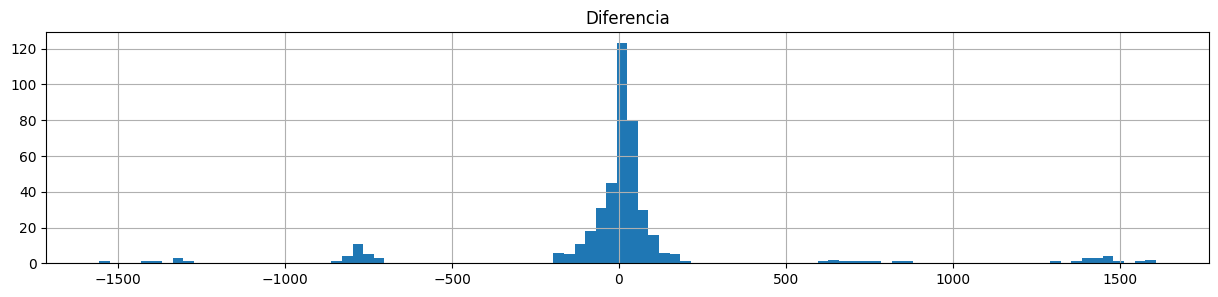

In [183]:
df_CANCER_MAMA_TAM_BIO[["Diferencia"]].hist(bins=100, figsize=(15, 3))

MEAN of TAM_BIO 25.678571428571427
MEAN of TAM_BIO 23.5625
MEAN of TAM_BIO 47.2967032967033


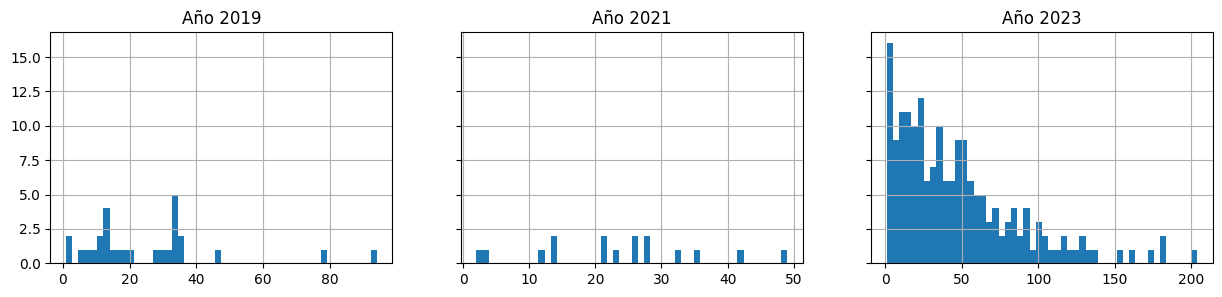

In [213]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3), sharey=True)

for i, year in enumerate([2019, 2021, 2023]):
    df_sample = df_CANCER_MAMA_TAM_BIO[(df_CANCER_MAMA_TAM_BIO["Fecha_atencion_TAM"].dt.year == year) & 
                           (df_CANCER_MAMA_TAM_BIO["Diferencia"].abs() <= 365) &
                           (df_CANCER_MAMA_TAM_BIO["Diferencia"] > 0)]
    
    df_sample["Diferencia"].hist(bins=50, ax=ax[i])
    ax[i].set_title(f"Año {year}")
    print("MEAN of TAM_BIO" , df_sample["Diferencia"].mean())

MEAN of TAM_BIO 25.678571428571427
MEAN of TAM_BIO 23.5625
MEAN of TAM_BIO 47.2967032967033


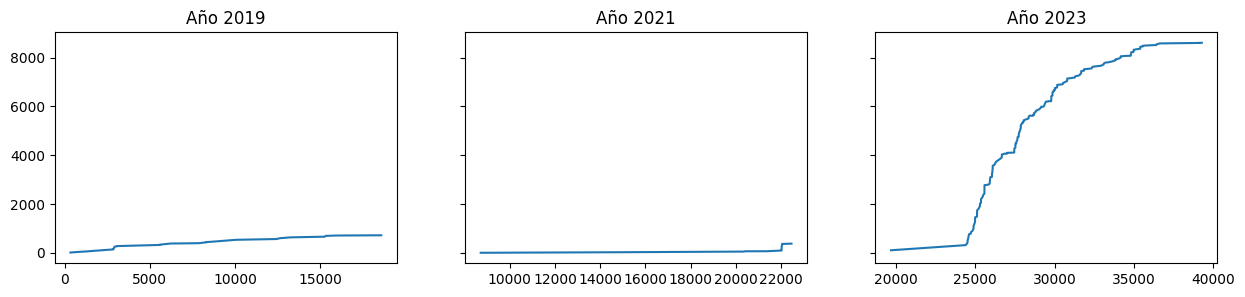

In [209]:
# plot histograms of the difference, but every histogram will be for a different year
fig, ax = plt.subplots(1, 3, figsize=(15, 3), sharey=True)

for i, year in enumerate([2019, 2021, 2023]):
    df_sample = df_CANCER_MAMA_TAM_BIO[(df_CANCER_MAMA_TAM_BIO["Fecha_atencion_TAM"].dt.year == year) & 
                           (df_CANCER_MAMA_TAM_BIO["Diferencia"].abs() <= 365) &
                           (df_CANCER_MAMA_TAM_BIO["Diferencia"] > 0)]
    
    df_sample["Diferencia"].cumsum().plot(ax=ax[i])
    ax[i].set_title(f"Año {year}")
    print("MEAN of TAM_BIO" , df_sample["Diferencia"].mean())

<AxesSubplot: >

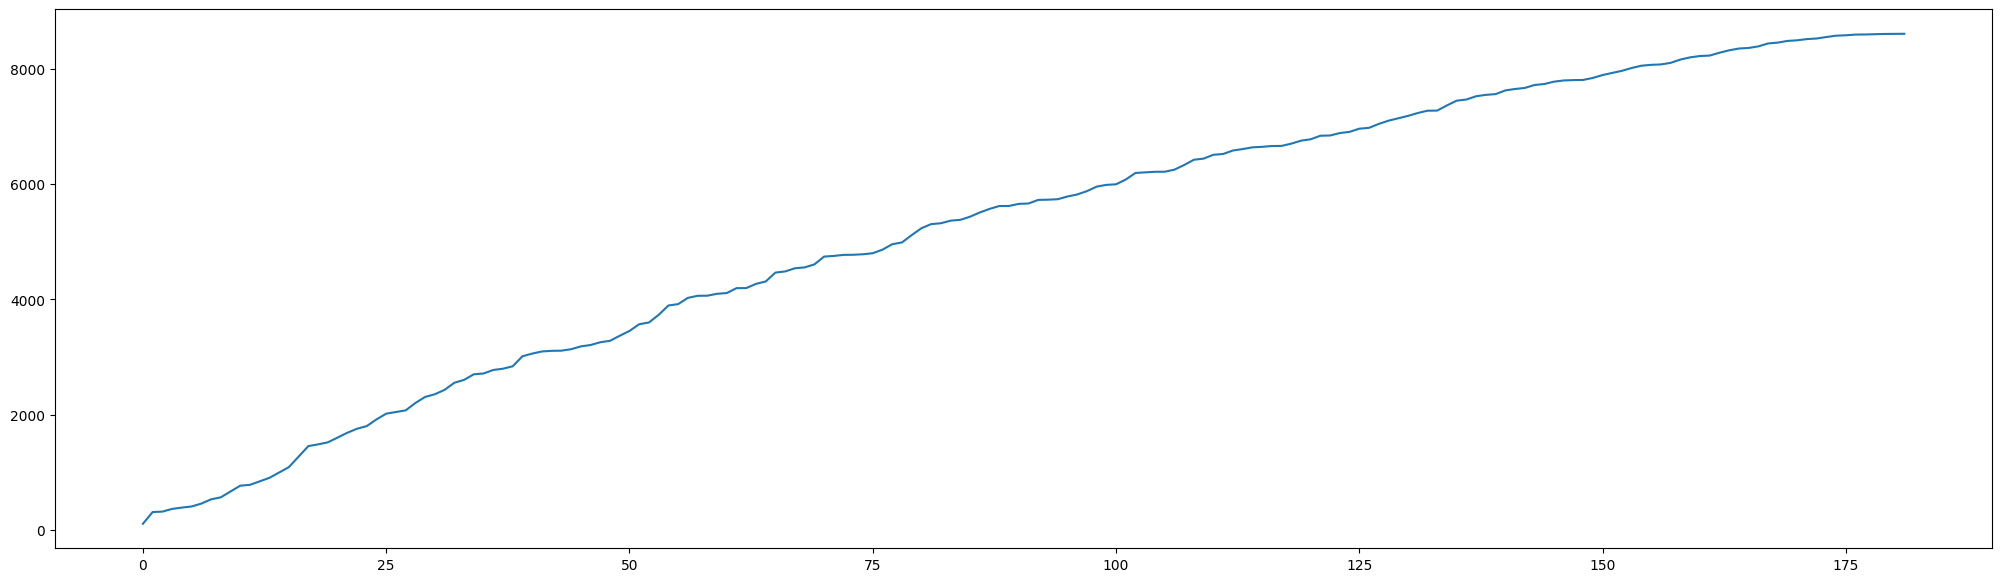

In [212]:
df_sample = df_CANCER_MAMA_TAM_BIO[(df_CANCER_MAMA_TAM_BIO["Fecha_atencion_TAM"].dt.year == 2023) & 
                           (df_CANCER_MAMA_TAM_BIO["Diferencia"].abs() <= 365) &
                           (df_CANCER_MAMA_TAM_BIO["Diferencia"] > 0)]

df_sample["Diferencia"].cumsum().reset_index(drop=True).plot()

Text(0.5, 1.0, 'Función de distribución acumulativa de la diferencia entre TAM y BIO')

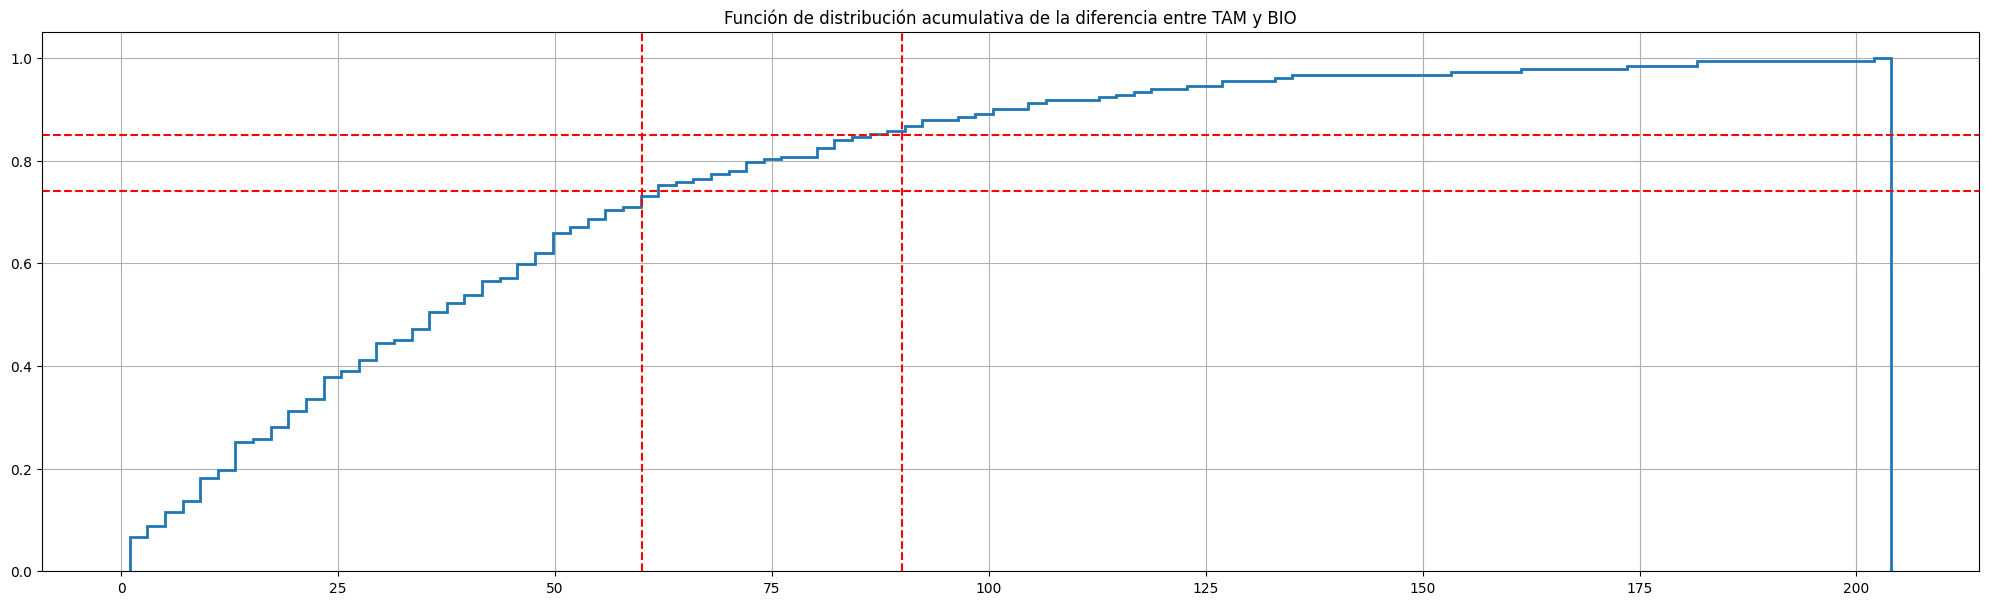

In [219]:
df_sample["Diferencia"].hist(bins=100, cumulative=True, density=1, histtype='step', linewidth=2)
plt.axvline(x=60, color='red', linestyle='--')

plt.axhline(y=0.74, color='red', linestyle='--')


plt.axvline(x=90, color='red', linestyle='--')

plt.axhline(y=0.85, color='red', linestyle='--')

plt.title("Función de distribución acumulativa de la diferencia entre TAM y BIO")

## BIOPSIA - DIAGNOSTICO

In [187]:
df_CANCER_MAMA_BIO_DIAG = df_CANCER_PROCEDIMIENTOS_CANCER_MAMA.merge(df_CANCER_ATENDIDOS_CANCER_MAMA[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_BIO","_DIAG")).dropna()
df_CANCER_MAMA_BIO_DIAG["Diferencia"] = (df_CANCER_MAMA_BIO_DIAG["Fecha_atencion_DIAG"] - df_CANCER_MAMA_BIO_DIAG["Fecha_atencion_BIO"]).dt.days
df_CANCER_MAMA_BIO_DIAG

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion_BIO,Etapa,Diagnostico,Tipo_Dx,id_eess,Year,Fecha_atencion_DIAG,Diferencia
7,15036480,49.0,A,F,1719,2019-01-03,30a-59a,19100,D,3297,2019.0,2019-01-03,0
8,15036480,49.0,A,F,1719,2019-01-03,30a-59a,19100,D,3297,2019.0,2019-01-11,8
9,15036480,49.0,A,F,1719,2019-01-03,30a-59a,19100,D,3297,2019.0,2019-01-14,11
19,4409501,73.0,A,F,1297,2019-01-04,60a+,19102,D,6203,2019.0,2019-01-17,13
20,4409501,73.0,A,F,1297,2019-01-04,60a+,19102,D,6203,2019.0,2019-01-21,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13556,14831868,68.0,A,F,1293,2023-07-31,60a+,19101,D,6207,2023.0,2023-07-31,0
13557,26579300,44.0,A,F,1323,2023-07-31,30a-59a,19101,D,5984,2023.0,2023-04-21,-101
13558,26579300,44.0,A,F,1323,2023-07-31,30a-59a,19101,D,5984,2023.0,2023-06-02,-59
13559,26579300,44.0,A,F,1323,2023-07-31,30a-59a,19101,D,5984,2023.0,2023-07-31,0


array([[<AxesSubplot: title={'center': 'Diferencia'}>]], dtype=object)

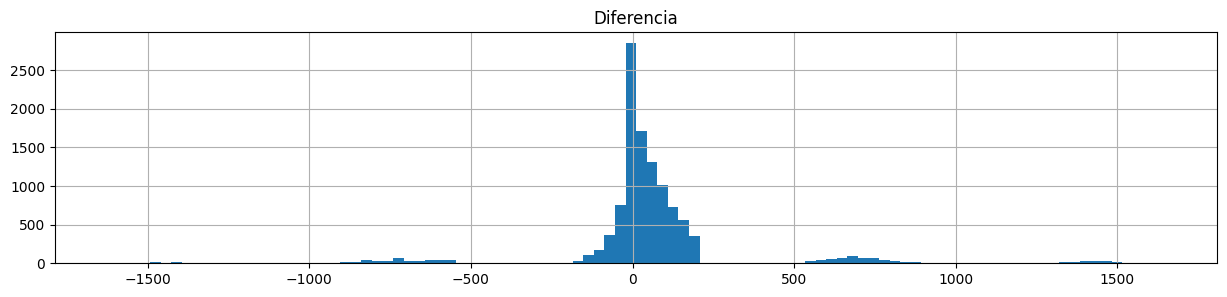

In [188]:
df_CANCER_MAMA_BIO_DIAG[["Diferencia"]].hist(bins=100, figsize=(15, 3))

MEAN of BIO_DIAG 52.73529411764706
MEAN of BIO_DIAG 63.55555555555556
MEAN of BIO_DIAG 78.84439528023599


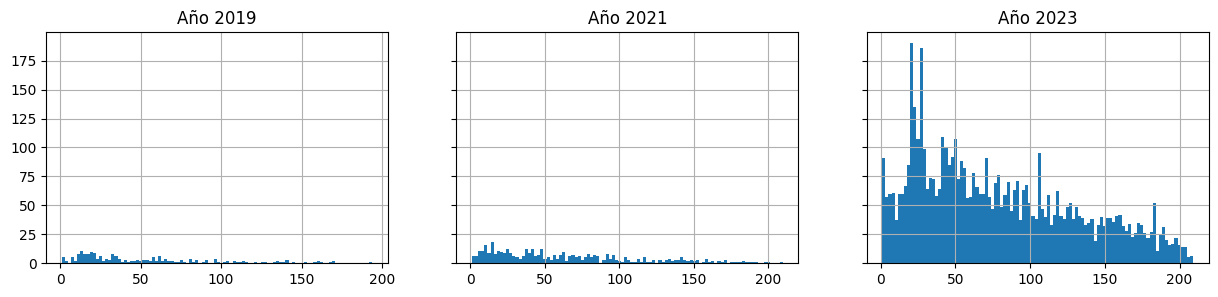

In [194]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3), sharey=True)

for i, year in enumerate([2019, 2021, 2023]):
    df_sample = df_CANCER_MAMA_BIO_DIAG[(df_CANCER_MAMA_BIO_DIAG["Fecha_atencion_BIO"].dt.year == year) & 
                           (df_CANCER_MAMA_BIO_DIAG["Diferencia"].abs() <= 365) &
                           (df_CANCER_MAMA_BIO_DIAG["Diferencia"] > 0)]
    df_sample["Diferencia"].hist(bins=100, ax=ax[i])
    ax[i].set_title(f"Año {year}")
    print("MEAN of BIO_DIAG" , df_sample["Diferencia"].mean())

## DIAGNOSTICO - TRATAMIENTO

### ALL

In [190]:
df_CANCER_MAMA_DIAG_ALL = df_CANCER_ATENDIDOS_CANCER_MAMA.merge(df_CANCER_TRATAMIENTOS_CANCER_MAMA_ALL[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_ALL")).dropna()
df_CANCER_MAMA_DIAG_ALL["Diferencia"] = (df_CANCER_MAMA_DIAG_ALL["Fecha_atencion_ALL"] - df_CANCER_MAMA_DIAG_ALL["Fecha_atencion_DIAG"]).dt.days
df_CANCER_MAMA_DIAG_ALL

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion_DIAG,Diagnostico,Tipo_Dx,id_eess,Etapa,Year,Fecha_atencion_ALL,Diferencia
31,10729255,52.0,A,F,1292,2019-01-02,C500,D,5788,30a-59a,2019.0,2023-05-13,1592
32,10729255,52.0,A,F,1292,2019-01-30,C509,D,6208,30a-59a,2019.0,2023-05-13,1564
33,10729255,52.0,A,F,1292,2019-05-02,C509,D,6208,30a-59a,2019.0,2023-05-13,1472
34,10729255,54.0,A,F,1292,2021-07-24,C509,D,6208,30a-59a,2021.0,2023-05-13,658
35,9658833,49.0,A,F,1300,2019-01-02,C500,D,6208,30a-59a,2019.0,2019-02-13,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119480,1775923,77.0,A,F,1323,2023-07-27,C509,D,5984,60a+,2023.0,2023-06-26,-31
119481,1775923,77.0,A,F,1323,2023-07-27,C509,D,5984,60a+,2023.0,2023-07-03,-24
119482,1775923,77.0,A,F,1323,2023-07-27,C509,D,5984,60a+,2023.0,2023-07-24,-3
119487,2083846,73.0,A,F,1322,2023-07-27,C500,D,5984,60a+,2023.0,2023-05-05,-83


array([[<AxesSubplot: title={'center': 'Diferencia'}>]], dtype=object)

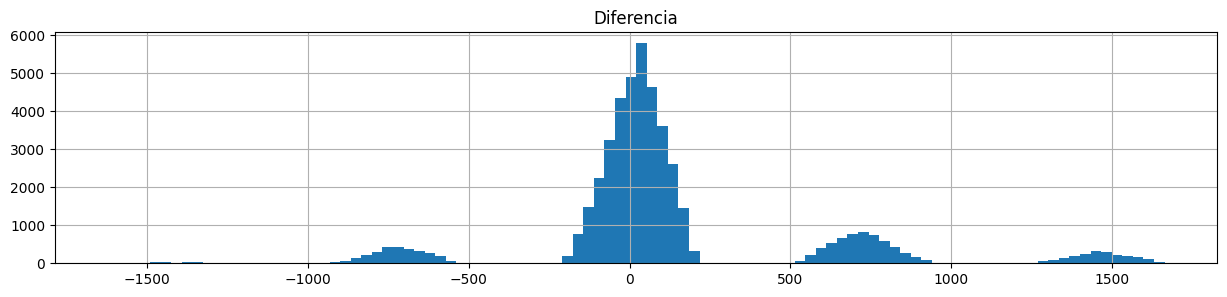

In [191]:
df_CANCER_MAMA_DIAG_ALL[["Diferencia"]].hist(bins=100, figsize=(15, 3))

MEAN of DIAG_ALL 72.14133333333334
MEAN of DIAG_ALL 64.77702888583218
MEAN of DIAG_ALL 77.50231863554193


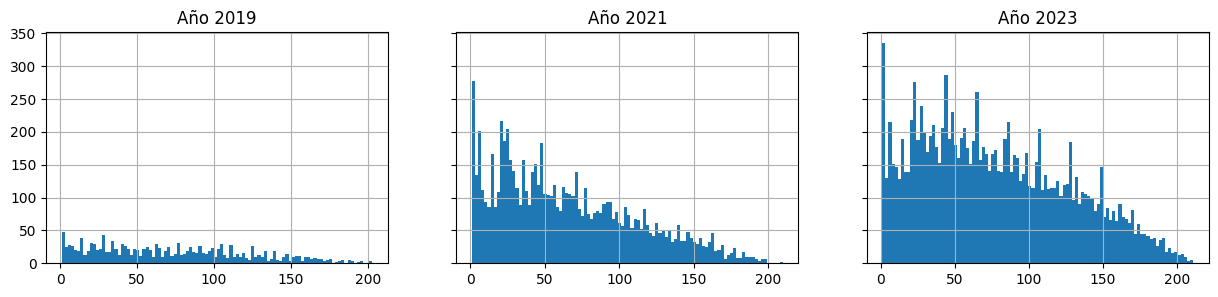

In [193]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3), sharey=True)

for i, year in enumerate([2019, 2021, 2023]):
    df_sample = df_CANCER_MAMA_DIAG_ALL[(df_CANCER_MAMA_DIAG_ALL["Fecha_atencion_DIAG"].dt.year == year) & 
                           (df_CANCER_MAMA_DIAG_ALL["Diferencia"].abs() <= 365) &
                           (df_CANCER_MAMA_DIAG_ALL["Diferencia"] > 0)]
    df_sample["Diferencia"].hist(bins=100, ax=ax[i])
    ax[i].set_title(f"Año {year}")
    print("MEAN of DIAG_ALL" , df_sample["Diferencia"].mean())

### QUIMIO

In [197]:
df_CANCER_MAMA_DIAG_QUIMIO = df_CANCER_ATENDIDOS_CANCER_MAMA.merge(df_CANCER_TRATAMIENTOS_CANCER_MAMA_QUIMIO[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_QUIMI")).dropna()
df_CANCER_MAMA_DIAG_QUIMIO["Diferencia"] = (df_CANCER_MAMA_DIAG_QUIMIO["Fecha_atencion_QUIMI"] - df_CANCER_MAMA_DIAG_QUIMIO["Fecha_atencion_DIAG"]).dt.days
df_CANCER_MAMA_DIAG_QUIMIO

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion_DIAG,Diagnostico,Tipo_Dx,id_eess,Etapa,Year,Fecha_atencion_QUIMI,Diferencia
31,10729255,52.0,A,F,1292,2019-01-02,C500,D,5788,30a-59a,2019.0,2023-05-13,1592
32,10729255,52.0,A,F,1292,2019-01-30,C509,D,6208,30a-59a,2019.0,2023-05-13,1564
33,10729255,52.0,A,F,1292,2019-05-02,C509,D,6208,30a-59a,2019.0,2023-05-13,1472
34,10729255,54.0,A,F,1292,2021-07-24,C509,D,6208,30a-59a,2021.0,2023-05-13,658
35,9658833,49.0,A,F,1300,2019-01-02,C500,D,6208,30a-59a,2019.0,2019-02-13,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118368,1775923,77.0,A,F,1323,2023-07-27,C509,D,5984,60a+,2023.0,2023-06-26,-31
118369,1775923,77.0,A,F,1323,2023-07-27,C509,D,5984,60a+,2023.0,2023-07-03,-24
118370,1775923,77.0,A,F,1323,2023-07-27,C509,D,5984,60a+,2023.0,2023-07-24,-3
118375,2083846,73.0,A,F,1322,2023-07-27,C500,D,5984,60a+,2023.0,2023-05-05,-83


MEAN of DIAG_QUIMIO 71.58108108108108
MEAN of DIAG_QUIMIO 64.9866870059631
MEAN of DIAG_QUIMIO 77.19001903500786


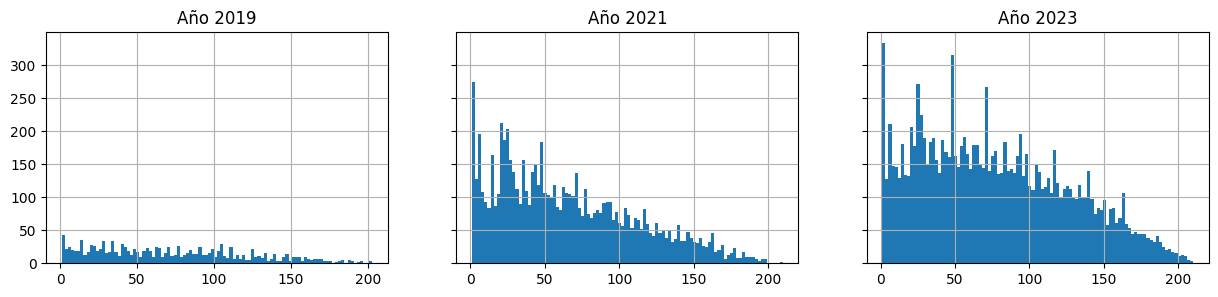

In [198]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3), sharey=True)

for i, year in enumerate([2019, 2021, 2023]):
    df_sample = df_CANCER_MAMA_DIAG_QUIMIO[(df_CANCER_MAMA_DIAG_QUIMIO["Fecha_atencion_DIAG"].dt.year == year) & 
                           (df_CANCER_MAMA_DIAG_QUIMIO["Diferencia"].abs() <= 365) &
                           (df_CANCER_MAMA_DIAG_QUIMIO["Diferencia"] > 0)]
    df_sample["Diferencia"].hist(bins=100, ax=ax[i])
    ax[i].set_title(f"Año {year}")
    print("MEAN of DIAG_QUIMIO" , df_sample["Diferencia"].mean())

### RADIO

In [202]:
df_CANCER_MAMA_DIAG_RADIO = df_CANCER_ATENDIDOS_CANCER_MAMA.merge(df_CANCER_TRATAMIENTOS_CANCER_MAMA_RADIO[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_RADIO")).dropna()
df_CANCER_MAMA_DIAG_RADIO["Diferencia"] = (df_CANCER_MAMA_DIAG_RADIO["Fecha_atencion_RADIO"] - df_CANCER_MAMA_DIAG_RADIO["Fecha_atencion_DIAG"]).dt.days
df_CANCER_MAMA_DIAG_RADIO

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion_DIAG,Diagnostico,Tipo_Dx,id_eess,Etapa,Year,Fecha_atencion_RADIO,Diferencia
35,9658833,49.0,A,F,1300,2019-01-02,C500,D,6208,30a-59a,2019.0,2019-06-27,176
36,9658833,49.0,A,F,1300,2019-01-14,C509,D,6198,30a-59a,2019.0,2019-06-27,164
37,9658833,49.0,A,F,1300,2019-01-16,C509,D,6208,30a-59a,2019.0,2019-06-27,162
38,9658833,50.0,A,F,1300,2019-02-18,C509,D,6208,30a-59a,2019.0,2019-06-27,129
39,9658833,50.0,A,F,1300,2019-03-01,C500,D,6208,30a-59a,2019.0,2019-06-27,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81134,31447959,41.0,A,F,336,2023-07-03,C500,D,1232,30a-59a,2023.0,2023-06-26,-7
81135,31447959,41.0,A,F,336,2023-07-03,C500,D,1232,30a-59a,2023.0,2023-06-27,-6
81136,31447959,41.0,A,F,336,2023-07-03,C500,D,1232,30a-59a,2023.0,2023-06-29,-4
81137,31447959,41.0,A,F,336,2023-07-03,C500,D,1232,30a-59a,2023.0,2023-07-04,1


MEAN of DIAG_RADIO 76.58333333333333
MEAN of DIAG_RADIO 39.152542372881356
MEAN of DIAG_RADIO 83.3984375


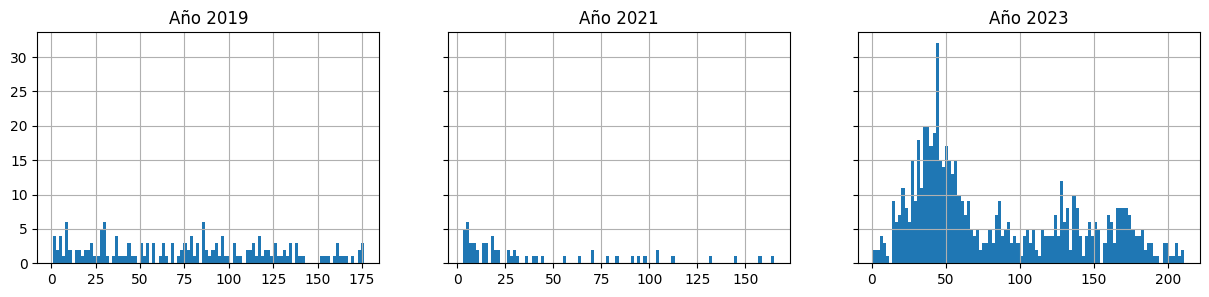

In [203]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3), sharey=True)

for i, year in enumerate([2019, 2021, 2023]):
    df_sample = df_CANCER_MAMA_DIAG_RADIO[(df_CANCER_MAMA_DIAG_RADIO["Fecha_atencion_RADIO"].dt.year == year) & 
                           (df_CANCER_MAMA_DIAG_RADIO["Diferencia"].abs() <= 365) &
                           (df_CANCER_MAMA_DIAG_RADIO["Diferencia"] > 0)]
    df_sample["Diferencia"].hist(bins=100, ax=ax[i])
    ax[i].set_title(f"Año {year}")
    print("MEAN of DIAG_RADIO" , df_sample["Diferencia"].mean())

### BRAQUI

In [204]:
df_CANCER_MAMA_DIAG_BRAQUI = df_CANCER_ATENDIDOS_CANCER_MAMA.merge(df_CANCER_TRATAMIENTOS_CANCER_MAMA_BRAQUI[["id_persona","Fecha_atencion"]],on='id_persona', how= "outer", suffixes=("_DIAG","_ALL")).dropna()
df_CANCER_MAMA_DIAG_BRAQUI["Diferencia"] = (df_CANCER_MAMA_DIAG_BRAQUI["Fecha_atencion_ALL"] - df_CANCER_MAMA_DIAG_BRAQUI["Fecha_atencion_DIAG"]).dt.days
df_CANCER_MAMA_DIAG_BRAQUI

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion_DIAG,Diagnostico,Tipo_Dx,id_eess,Etapa,Year,Fecha_atencion_ALL,Diferencia


MEAN of DIAG_BRAQUI nan
MEAN of DIAG_BRAQUI nan
MEAN of DIAG_BRAQUI nan


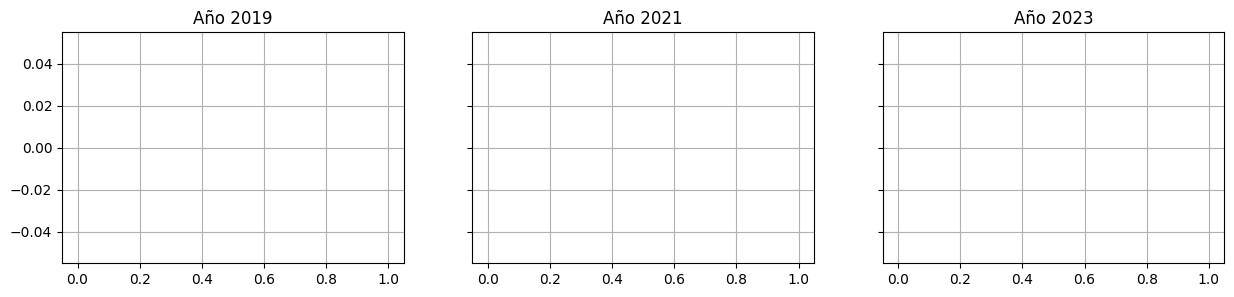

In [205]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3), sharey=True)

for i, year in enumerate([2019, 2021, 2023]):
    df_sample = df_CANCER_MAMA_DIAG_BRAQUI[(df_CANCER_MAMA_DIAG_BRAQUI["Fecha_atencion_DIAG"].dt.year == year) & 
                           (df_CANCER_MAMA_DIAG_BRAQUI["Diferencia"].abs() <= 365) &
                           (df_CANCER_MAMA_DIAG_BRAQUI["Diferencia"] > 0)]
    df_sample["Diferencia"].hist(bins=100, ax=ax[i])
    ax[i].set_title(f"Año {year}")
    print("MEAN of DIAG_BRAQUI" , df_sample["Diferencia"].mean())